## Heart Failure Prediction

Team Members: Joshua Hanscom,  Andrew Rivera and Abigail Diaz

Course: CS4661 – Data Science / Machine Learning

Instructor: Professor Mohammad Pourhomayoun

Date: December 01, 2025

## 1. Introduction

Heart failure is a serious medical condition influenced by a combination of demographic, clinical, and physiological factors. Early prediction of potential heart failure can support proactive care and improve patient outcomes.

In this project, we analyze the **Heart Failure Prediction** dataset to identify factors associated with heart failure and build models capable of predicting patient survival or risk of heart failure.

## 2. Objectives

1. **Classification:** Predict whether a patient is likely to experience heart failure (or survive) based on health attributes.
2. **Clustering:** Use unsupervised learning to identify subgroups of patients with similar risk profiles.
3. **Feature Analysis:** Investigate which features are most strongly associated with heart failure to uncover key risk indicators.

By comparing multiple modeling strategies, we aim to determine which methods provide the most accurate and meaningful insights into heart failure risk.


## 3. Dataset Description

The dataset, sourced from [Kaggle - Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), contains **918 unique patient records**, each with **11 features** and a binary target variable `HeartDisease` (1 = yes, 0 = no).

**Features include:**

- Age
- Sex
- ChestPainType
- RestingBP
- Cholesterol
- FastingBS
- RestingECG
- MaxHR
- ExerciseAngina
- Oldpeak
- ST_Slope

The target variable indicates whether the patient has experienced or is at risk of heart failure.


## 4. Data Preprocessing

Before model training, the dataset will be cleaned and prepared as follows:

- **Initial Observation** check dataset overall shape and data types.
- **Handle missing values** (if any)
- **Handle duplicate records** (if any)
- **Split data** into training and testing subsets for evaluation consistency
- **Scale numerical variables** as required by model type

### 4.1 Data Loading and Initial Exploration
We loaded the Heart Failure Prediction dataset from Kaggle's CSV file 
(heart.csv) into a pandas DataFrame named df. To verify successful loading, 
we examined the DataFrame's shape, first few rows, structure, data types and missing or duplicate records.

In [11]:
import pandas as pd

df = pd.read_csv("dataset/heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Initial Observations
The dataset contains mixed data types requiring preprocessing: numerical features (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) will need scaling for distance-based models, while categorical features (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) require one-hot encoding. A comprehensive data exploration and preprocessing pipeline is described in Section 4.2.

In [2]:
print(f"Dataset shape: {df.shape}")
print(f"Patient records: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (918, 12)
Patient records: 918
Total columns: 12


The shape `(918, 12)` establishes our dataset baseline: 918 patients and 12 
variables. This is critical for subsequent quality checks, since we expect all columns 
to contain 918 non-null values if the data is complete.


### Handling Missing Data
Missing data can significantly impact model performance by introducing bias, 
reducing statistical power, or causing errors during training. Before proceeding 
with analysis, we must verify data completeness.

We examined the dataset structure to identify any missing values:

In [12]:
# Shows column types, non-null counts, memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


The `df.info()` output above confirms data integrity. For clarity, we present 
a formatted summary below:

In [13]:
# Check structure and data types
print("Dataset Structure and Completeness Check:")
# Info table
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})

print(info_df)

Dataset Structure and Completeness Check:
            Column  Non-Null Count Data Type
0              Age             918     int64
1              Sex             918    object
2    ChestPainType             918    object
3        RestingBP             918     int64
4      Cholesterol             918     int64
5        FastingBS             918     int64
6       RestingECG             918    object
7            MaxHR             918     int64
8   ExerciseAngina             918    object
9          Oldpeak             918   float64
10        ST_Slope             918    object
11    HeartDisease             918     int64


**Observation**

The **Non-Null Count** column confirms data completeness: all features show 
918 non-null values, matching our total record count from `shape`. This 
indicates no missing data, allowing us to proceed without imputation and 
preserve the full sample for model training.

### Handling Duplicate Records

In [14]:
# Check for duplicate records
print("Checking for duplicate patient records")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Checking for duplicate patient records
Number of duplicate rows: 0


**Observation**

No duplicate records were found in the dataset. Each of the 918 entries 
represents a unique patient record, ensuring data integrity for model training.

### Data Cleaning
Initial inspection of the dataset using `df.info()`revealed no missing values across all 918 records and 12 columns. Additionally, a check for duplicate entries using `df.duplicated().sum()` confirmed that each 
patient record is unique. Given the completeness and integrity of the data, no 
cleaning steps is required and we proceed directly to feature encoding.

## 4.2 Data Preparation

Now that we’ve verified the dataset’s integrity, we can construct the **feature matrix (`X`)** and **label vector (`y`)** for model training.

We begin by selecting all relevant feature columns from the dataset.  

The target variable, `HeartDisease`, will serve as our label vector (`y`), while the remaining columns form the feature matrix (`X`).

In [21]:
# label vector
y = df['HeartDisease']

counts = y.value_counts().to_dict()

print("HeartDisease Distribution:")
print(f"No heart disease = {counts[0]}")
print(f"Heart disease = {counts[1]}")

HeartDisease Distribution:
No heart disease = 410
Heart disease = 508


In [16]:
features_cols = df.columns[:-1]

# feature matrix
X = df[features_cols]
X[::100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat
400,50,F,ASY,160,0,1,Normal,110,N,0.0,Flat
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down
600,57,M,ASY,130,207,0,ST,96,Y,1.0,Flat
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up
800,43,M,NAP,130,315,0,Normal,162,N,1.9,Up
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down


With the data prepared, we now split it into **training** and **testing** subsets to evaluate how well the model generalizes to unseen data.  

### Splitting the Data for Model Evaluation

We explore two common evaluation strategies to assess model performance:

1. **k-Fold Cross-Validation** – The training set is further evaluated using k-fold cross-validation, which repeatedly trains and tests the model across multiple folds of the data. This provides a stable estimate of model performance, helps guide hyperparameter selection, and reduces sensitivity to any particular partition of the training data.

2. **Standard Train/Test Split** – The dataset is split into an 80% training set and a 20% hold-out test set. This provides a quick baseline evaluation of each model’s performance on unseen data. The test set remains untouched during training, ensuring an unbiased estimate of generalization.

By combining these two strategies, we obtain both robust performance estimates via cross-validation and final, unbiased evaluation using the hold-out test set.


### Standard Train/Test Split

We begin by establishing a **baseline performance** for our models using a simple 80/20 train–test split.  
This approach provides an initial benchmark for accuracy and other key metrics before applying more rigorous validation methods such as k-fold cross-validation.

The data is split into **training** and **testing** subsets using `train_test_split`.

We will use the following parameters: `test_size`=**0.2**, `random_state`=**42**.

Our *test size* indicates that our training dataset will take up 80% of the total dataset while the testing set takes up 20%.

Our *random state* is a seed that allows us to have replicable results when splitting the data.

We then train the Decision Tree model on the training data and evaluate it on the unseen test data.

In [17]:
from sklearn.model_selection import train_test_split

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

## 4.3 Standardization

### Preprocessing and Feature Concatenation
After splitting the dataset, we preprocess the numerical and categorical features independently to prepare them for machine learning model training. Numerical features are standardized using StandardScaler, which centers each feature to zero mean and unit variance. This transformation is essential for models that are sensitive to feature magnitude, such as Logistic Regression, Support Vector Machines, and k-Nearest Neighbors. Categorical features are encoded using One-Hot Encoding with drop='first' to avoid multicollinearity.

Because tree-based models (Decision Tree, Random Forest, Gradient Boosted Trees) do not require feature scaling and often perform better on raw numeric values, we create two final training and testing datasets. The scaled dataset (scaled numerical + encoded categorical features) is used for models that rely on distance or gradient calculations, while the unscaled dataset (raw numerical + encoded categorical features) is used for tree-based models. This ensures that each algorithm receives its optimal form of the data without unnecessary transformations.

In [22]:
num_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
cat_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

X_train_num = X_train[num_cols].reset_index(drop=True)
X_test_num  = X_test[num_cols].reset_index(drop=True)

X_train_cat = X_train[cat_cols].reset_index(drop=True)
X_test_cat  = X_test[cat_cols].reset_index(drop=True)

### Encoding Categorical Features

Several features in this dataset are categorical (e.g., `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`) and must be encoded before model training. Since scikit-learn's models, including Logistic Regression, KNN, Random Forests, Gradient Boosting, and Decision Trees—require numeric inputs, these values cannot be used in their raw text form.

We use scikit-learn's `OneHotEncoder` to convert each categorical column into a set of binary indicator variables (0/1). This avoids incorrectly introducing an ordinal relationship between categories and allows the model to treat each category independently.

**Note:** We set `sparse_output=False` so the encoder returns a dense NumPy array, which can be easily converted into a Pandas DataFrame.

#### Why the Encoder Is Fit on the Training Data Only

Just like scaling, `OneHotEncoder` must be fit using only the training data. This prevents **data leakage**, which happens when information from the test set unintentionally influences the training process.

If the encoder is fit on the entire dataset:
- It "sees" categories from the test set ahead of time
- The test set is no longer truly unseen
- Evaluation metrics become overly optimistic and invalid

To avoid this, the correct workflow is:

1. **Fit** the encoder on the training set (learns the categories)
2. **Transform** both training and test sets using this fitted encoder
3. During cross-validation, the encoder is fit inside each fold using only the fold's training data

This ensures that at every stage, the model only has access to information available during training, maintaining fair and valid evaluation results.

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

train_cat_encoded = encoder.fit_transform(X_train_cat)
test_cat_encoded  = encoder.transform(X_test_cat)

cat_encoded_cols = encoder.get_feature_names_out(cat_cols)

X_train_cat_df = pd.DataFrame(train_cat_encoded, columns=cat_encoded_cols)
X_test_cat_df  = pd.DataFrame(test_cat_encoded, columns=cat_encoded_cols)

### Concatinate Final Data

In [25]:
X_train_final_unscaled = pd.concat([X_train_num, X_train_cat_df], axis=1)
X_test_final_unscaled  = pd.concat([X_test_num,  X_test_cat_df], axis=1)

### Scaling Numerical Features

Before training our models, we standardize all numerical features to ensure they are on a comparable scale. This is important because we use both distance-based models (KNN and K-Means) and gradient-based models (Logistic Regression), which can be heavily influenced by differences in feature magnitude. Without scaling, variables with larger numeric ranges (e.g., Cholesterol, MaxHR) could dominate the learning process and distort model performance.

We use `StandardScaler` to transform numerical features by removing the mean and scaling to unit variance. This centers the data around zero and ensures all numeric features contribute proportionally to the model.

A crucial detail is that scaling must be fit only on the training data—not the entire dataset.
If we scale using all data before splitting or before cross-validation, the scaler “sees” information from the test set or validation folds. This results in data leakage, giving the model access to information it should not have during training. This contaminates the evaluation and leads to overly optimistic results.

To avoid this, the scaler is fit on the training set only, then applied (transformed) to both the training and test sets.

Decision Tree, Random Forest and Gradient Boosted Trees does not require feature scaling despite the scale differences in the dataset. This is because these models work with relative ordering and split points. Threshold values for each feature depend on information gain rather than scale, meaning the tree structure is unaffected by differences in feature magnitude.

> **Note:** Categorical variables will be handled separately through one-hot encoding and are *NOT* affected by scaling.

In [147]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

num_feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num  = scaler.transform(X_test_num)

X_train_scaled_num_df = pd.DataFrame(X_train_scaled_num, columns=num_cols)
X_test_scaled_num_df  = pd.DataFrame(X_test_scaled_num,  columns=num_cols)

X_train_final_scaled = pd.concat([X_train_scaled_num_df, X_train_cat_df], axis=1)
X_test_final_scaled  = pd.concat([X_test_scaled_num_df,  X_test_cat_df], axis=1)


## Methods / Models Used

We explore both **supervised** and **unsupervised** learning methods:

### Supervised Models

- **Logistic Regression:** Baseline linear model to identify features most strongly influencing heart failure risk.
- **Decision Tree:** A baseline tree-based model providing a visual, hierarchical representation of how features split and contribute to heart failure prediction.”
- **Random Forest:** Captures non-linear relationships and provides robust feature importance metrics.
- **Gradient Boosted Trees (GB Trees):** Improves accuracy through sequential learning and weighted updates.

### Unsupervised Learning

- **Clustering (e.g., K-Means):** Used to explore underlying patterns or patient subgroups within the dataset.



### Initializing Models

To ensure consistency in training and evaluation, we create two separate groups of models based on their preprocessing requirements. Some algorithms, such as Logistic Regression and K-Nearest Neighbors, are sensitive to feature scaling and therefore require standardized numerical inputs. Other models, particularly tree-based algorithms like Decision Trees, Random Forests and Gradient Boosting, do not rely on feature scaling because they split data based on thresholds rather than distance measures. For this reason, we divide our models into `models_scaled'(trained on scaled and encoded data) and models_unscaled (trained on encoded but unscaled data). This separation ensures that each model receives the appropriate form of preprocessing and these fitted models are then used in the subsequent sections for feature importance analysis and predictive performance evaluation on the test set.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# scaled models
models_scaled = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)  # default k=5
}

# unscaled models
models_unscaled = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

### Fitting Models
We fit the models according to their specific preprocessing requirements to ensure that each algorithm receives data in a form that preserves its performance characteristics. Although the input features (X_train) differ between scaled and unscaled versions, the target variable (y_train) remains exactly the same for all models. This is because the output labels (presence or absence of heart disease) are categorical and require no scaling or transformation; every model interprets the target variable in the same way.

The fitting process itself does not include any additional preprocessing—such as scaling, encoding or feature engineering—because all transformations must be applied before training. If a model were to see differently preprocessed data during fitting versus testing, the learned parameters would not generalize properly. For this reason, each model is trained strictly on its corresponding version of the preprocessed training data:

Scaled models (Logistic Regression, KNN) are fitted on `X_train_scaled`, ensuring that all numerical features contribute proportionally during distance calculations or gradient-based optimization.

Unscaled models (Decision Tree, Random Forest, Gradient Boosting) are fitted on `X_train_unscaled`, preserving the original numeric ranges, which is appropriate since tree-based methods split features based on ordering, not magnitude.

By keeping `y_train` constant and fitting each model only after the appropriate preprocessing pipeline is applied, we maintain consistency, prevent data leakage and ensure that the training process accurately reflects how the model will behave during testing and real-world predictions.

In [28]:

# Fit all models first
for name, model in models_scaled.items():
    model.fit(X_train_final_scaled, y_train)

for name, model in models_unscaled.items():
    model.fit(X_train_final_unscaled, y_train)


## Feature Analysis
The goal of this section is to understand which features drive the predictions of our heart disease models and to compare how different models weigh the same inputs. By analyzing feature importance, we gain insights into both the predictive process and the clinical relevance of each variable, which is crucial for interpretability and trust in machine learning models.

We focus on the following models, fitted on the full training set according to their preprocessing requirements:

Logistic Regression (scaled): Coefficients represent the effect of each feature on the predicted probability of heart disease. Positive coefficients indicate that higher feature values increase risk, while negative coefficients suggest protective effects. Scaling ensures that features are comparable in magnitude, so the coefficient magnitudes reflect relative importance accurately.

Decision Tree (unscaled): Feature importance is based on the reduction of impurity (Gini or entropy) contributed by each feature when splitting nodes. This gives a hierarchical view of which features the model prioritizes in decision-making.

Random Forest & Gradient Boosting (unscaled): These ensemble models provide averaged feature importances across multiple trees, highlighting features that consistently contribute to predictions. Their importances reflect both hierarchical relevance and stability across trees.

K-Nearest Neighbors (scaled): Although KNN does not have inherent feature importance, we use permutation importance on the test set to quantify how shuffling each feature affects predictive performance, providing a measure of each feature’s predictive contribution.

This analysis is critical for understanding why some models perform better than others, as it highlights the most influential predictors, uncovers potential redundancies, and helps identify clinically meaningful patterns. By visualizing all feature importances together in a heatmap, we can quickly compare how each model prioritizes different features, offering a clear, interpretable summary of model behavior.

### Logistic Regression Feature Analysis

In [126]:
# Extract coefficients
import numpy as np 
feature_names = X_train_final_scaled.columns
coefficients = models_scaled['Logistic Regression'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs(Coefficient)': np.abs(coefficients)
}).sort_values(by='Abs(Coefficient)', ascending=False)

display(coef_df.head(12).style.hide(axis="index"))


Feature,Coefficient,Abs(Coefficient)
ChestPainType_NAP,-1.351292,1.351292
ChestPainType_ATA,-1.297071,1.297071
ST_Slope_Flat,1.193048,1.193048
Sex_M,1.157261,1.157261
ST_Slope_Up,-1.120944,1.120944
ExerciseAngina_Y,1.083229,1.083229
ChestPainType_TA,-0.857452,0.857452
Cholesterol,-0.515649,0.515649
Oldpeak,0.491518,0.491518
FastingBS,0.417487,0.417487


### Coefficient Analysis
The coefficient analysis reveals which features most strongly influence the logistic regression model’s prediction of heart disease.

- ChestPainType_NAP and ChestPainType_ATA have the largest negative coefficients, indicating that patients experiencing non-anginal or atypical angina are predicted to have a lower likelihood of heart disease.

- ST_Slope_Flat and Sex_M have the largest positive coefficients, showing that a flat ST segment during exercise and male sex are strongly associated with higher predicted risk. These features are likely favored by logistic regression because they exhibit strong, consistent correlations with the target variable in the training data, and the model assigns linear weights to maximize the likelihood.

- ExerciseAngina_Y also has a substantial positive coefficient, meaning patients with exercise-induced angina are more likely to be predicted as having heart disease.

- ST_Slope_Up has a negative coefficient, reflecting a protective effect; upward-sloping ST segments are associated with lower predicted risk.

- Other features such as Cholesterol, Oldpeak, FastingBS, and RestingECG_ST contribute more moderately, with their signs indicating either risk-increasing or protective effects.

Overall, the model’s coefficients align with medical expectations: features reflecting symptomatic or abnormal cardiac indicators (e.g., flat ST slope, male sex, exercise-induced angina) increase predicted heart disease risk, while features associated with normal or less severe presentations reduce it. Logistic regression favors features like ChestPainType and ST_Slope because they have high predictive signal relative to other variables, allowing the model to create a strong linear separation between cases and non-cases.

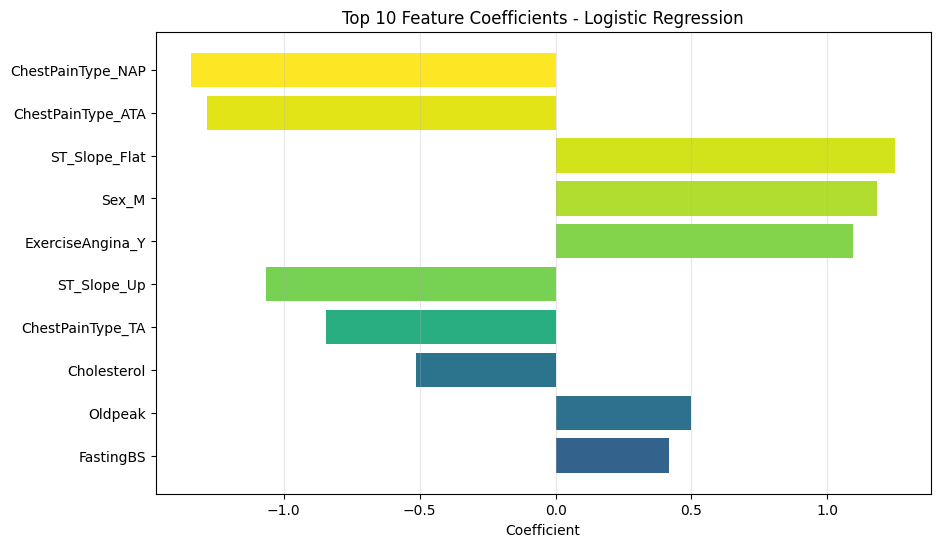

In [66]:
import matplotlib.pyplot as plt

# Assuming coef_df is already defined
top_features_lr = coef_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(top_features_lr['Abs(Coefficient)'] / top_features_lr['Abs(Coefficient)'].max())
plt.barh(top_features_lr['Feature'], top_features_lr['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Top 10 Feature Coefficients - Logistic Regression')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.show()


### Logistic Regression Feature Importance Graph

The bar chart displays the top 10 features based on their absolute coefficients in the Logistic Regression model:

- ChestPainType_NAP and ChestPainType_ATA have the strongest negative coefficients, indicating that these types of chest pain reduce the predicted probability of heart disease in this dataset.

- ST_Slope_Flat, Sex_M, and ExerciseAngina_Y have strong positive coefficients, highlighting their association with higher predicted risk.

- Features like Cholesterol, Oldpeak, and FastingBS contribute moderately.

Overall, the graph visually emphasizes which features the logistic model “trusts” most in predicting heart disease, reflecting the linear additive nature of coefficients. Positive values increase risk, while negative values decrease it, giving insight into the model’s decision-making process.

### Decision Tree Feature Analysis

In [92]:
from sklearn.tree import plot_tree

feature_importance_dt = pd.DataFrame({
    'Feature': X_train_final_unscaled.columns,
    'Importance': models_unscaled['Decision Tree'].feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance_dt.head(10).style.hide(axis="index"))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

Feature,Importance
ST_Slope_Up,0.398031
MaxHR,0.113995
Cholesterol,0.101571
Age,0.088398
Oldpeak,0.069489
RestingBP,0.052182
ExerciseAngina_Y,0.048063
Sex_M,0.045519
FastingBS,0.028817
ChestPainType_NAP,0.016927



The Decision Tree model highlights which features most strongly influence the hierarchical splitting decisions used to predict heart disease.

- ST_Slope_Up is the most important feature by far, with an importance score of 0.398. This indicates that the slope of the ST segment during exercise is the primary criterion the tree uses to separate patients with and without heart disease. The tree structure naturally prioritizes features that provide the largest reduction in impurity, which explains why ST_Slope_Up dominates the splits.

- MaxHR (maximum heart rate achieved) and Cholesterol follow, showing moderate importance. These features help the tree refine decisions after the top splits, contributing to improved predictive accuracy.

- Age, Oldpeak, and RestingBP have smaller but notable contributions, representing gradual refinement of risk predictions based on additional cardiovascular indicators.

- ExerciseAngina_Y, Sex_M, FastingBS, and ChestPainType_NAP appear later in the splits, meaning they influence predictions in more specific subgroups of the dataset rather than serving as primary discriminators.

Overall, the Decision Tree emphasizes features that provide the clearest separations in the data. The dominance of ST_Slope_Up indicates that the tree prioritizes features with strong, high-contrast splits, which may explain its robustness on training data. In contrast to logistic regression, which assigns linear weights, the tree focuses on hierarchical decision-making, so highly discriminative features like ST_Slope_Up naturally rise to the top.

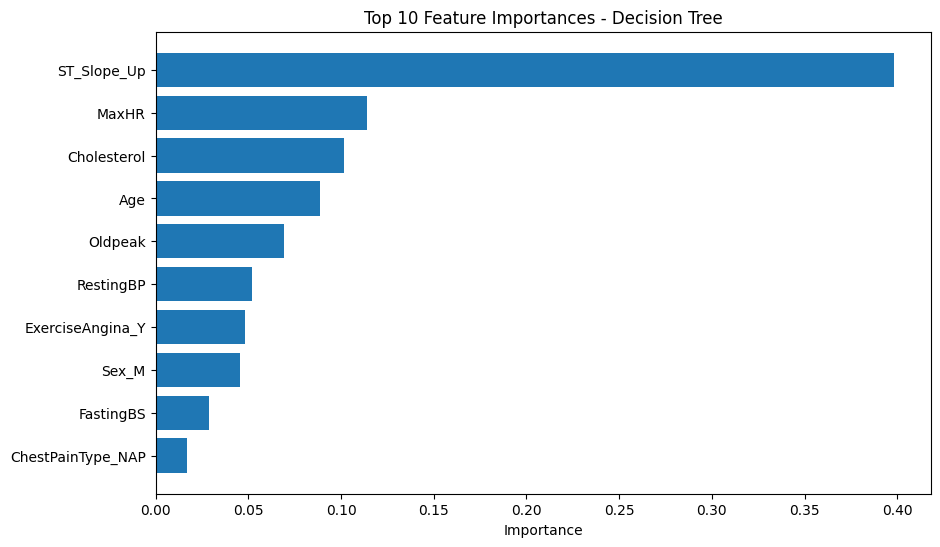

In [68]:
# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'][:10], feature_importance_dt['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

### Decision Tree Feature Importance Graph

The bar chart visualizes the top 10 most important features used by the Decision Tree to predict heart disease.

- ST_Slope_Up is clearly the dominant feature, confirming its primary role in splitting decisions.

- MaxHR, Cholesterol, and Age follow, showing moderate influence.

- Features such as ExerciseAngina_Y and ChestPainType_NAP have smaller bars, indicating they only affect specific subgroups in the tree.

Overall, the chart provides an at-a-glance understanding of which features the tree prioritizes, complementing the numerical importance scores. The visualization highlights how the model hierarchy favors features with the strongest discriminatory power.

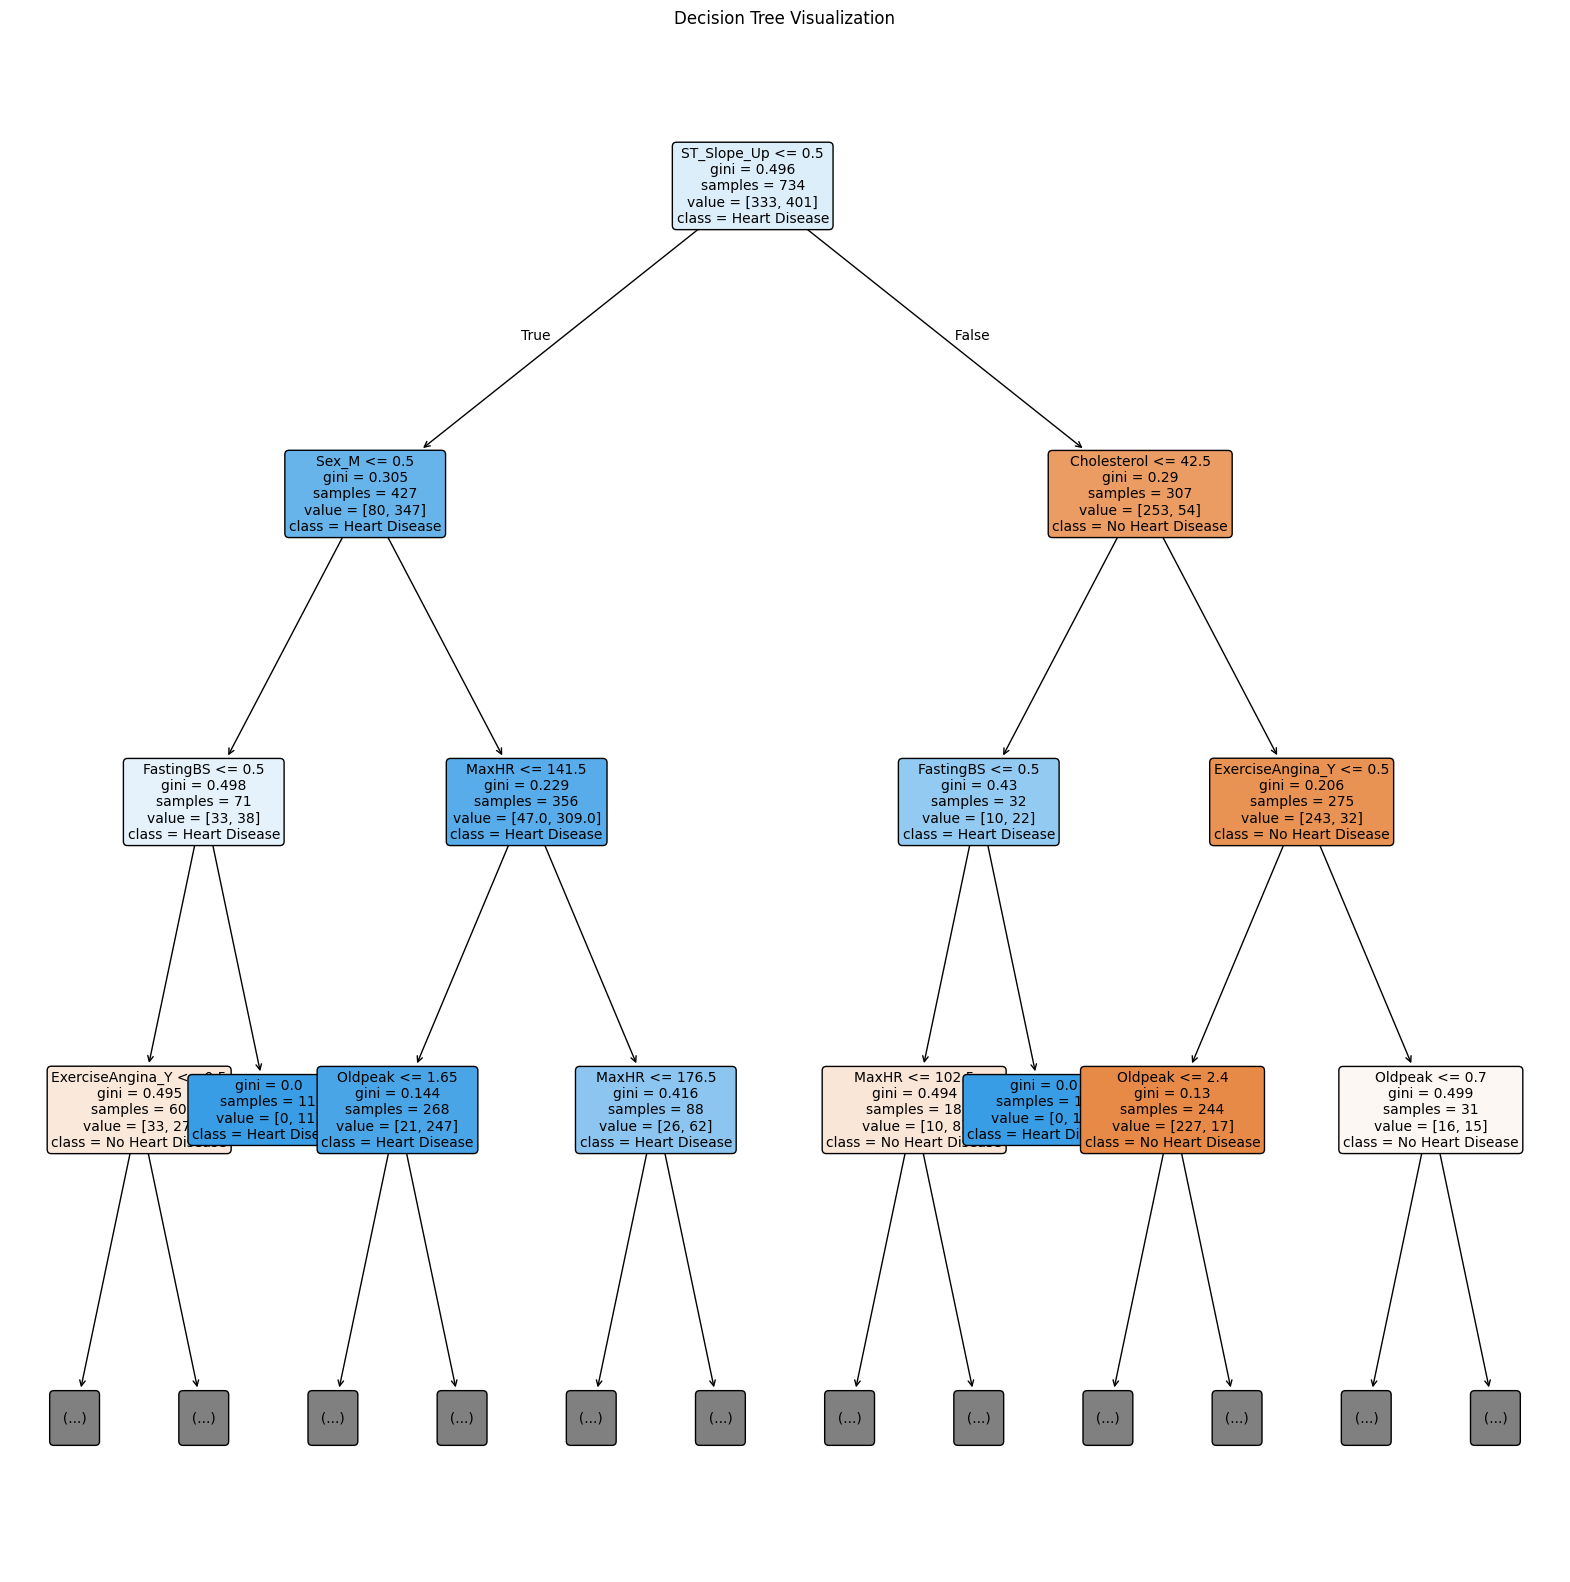

In [69]:
# tree plot
plt.figure(figsize=(20, 20))
plot_tree(models_unscaled['Decision Tree'], 
          feature_names=X_train_final_unscaled.columns,
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Visualization')
plt.show()

### Summary of Decision Tree Visualization

The Decision Tree plot shows the hierarchical structure of how the model makes predictions based on feature splits. At the top of the tree, the most important feature is ST_Slope_Up, which the model uses first to split the data (e.g., ST_Slope_Up <= 0.5). This indicates that an upward-sloping ST segment during exercise is the strongest predictor of lower heart disease risk in this dataset.

Subsequent splits involve features such as MaxHR, Cholesterol, and Age, which refine predictions by separating patients into groups with different risk probabilities. Each node shows the predicted class, the proportion of samples, and how the features interact hierarchically.

Overall, this visualization confirms the feature importance ranking from the earlier analysis and provides an intuitive understanding of how the tree-based model prioritizes features in making decisions. It complements the bar chart by showing actual decision paths, not just importance scores.

### Random Forest Feature Analysis

In [71]:
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_final_unscaled.columns,
    'Importance': models_unscaled['Random Forest'].feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Feature Importances - Random Forest")
display(feature_importance_rf.head(10).style.hide(axis="index"))
    
    

Top 10 Feature Importances - Random Forest


Feature,Importance
ST_Slope_Up,0.149099
MaxHR,0.117511
Oldpeak,0.112069
ST_Slope_Flat,0.108416
Cholesterol,0.103851
ExerciseAngina_Y,0.101613
Age,0.088802
RestingBP,0.071584
Sex_M,0.036660
ChestPainType_ATA,0.033246


The Random Forest model distributes importance across multiple features, reflecting how ensembles of trees capture complex interactions. In this dataset, the most influential feature is ST_Slope_Up, reinforcing its critical role in predicting lower heart disease risk when the ST segment slopes upward during exercise. Other highly important features include MaxHR and Oldpeak, which contribute to assessing cardiac stress during exercise, and ST_Slope_Flat, which increases risk when present.

Cholesterol and ExerciseAngina_Y also have notable contributions, indicating that traditional risk factors and exercise-induced angina remain relevant for the ensemble model. Features like Age, RestingBP, Sex_M, and ChestPainType_ATA are less dominant individually but still provide meaningful splits across trees.

Overall, the Random Forest importance profile reflects a combination of physiological measures and symptom indicators, emphasizing that multiple interacting features determine heart disease risk. Compared to a single Decision Tree, the Random Forest smooths out idiosyncratic splits, giving a more balanced assessment of feature influence across the ensemble.

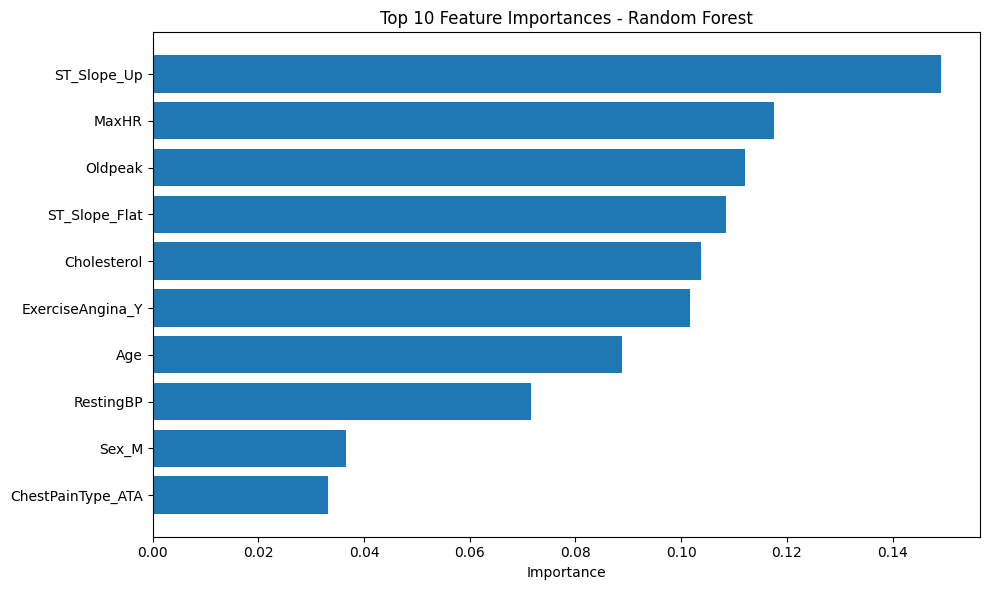

In [73]:
# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'][:10], feature_importance_rf['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The Random Forest feature importance highlights which variables most strongly influence the ensemble model’s predictions. ST_Slope_Up is the most impactful feature, indicating that an upward-sloping ST segment during exercise is strongly associated with lower heart disease risk. MaxHR and Oldpeak are also significant, showing the model’s sensitivity to exercise capacity and ST depression. Other influential features include ST_Slope_Flat, Cholesterol, and ExerciseAngina_Y, which align with clinical expectations of cardiovascular risk. Features like Sex_M and ChestPainType_ATA have lower importance but still contribute to predictions. The horizontal bar chart clearly visualizes the relative impact of each feature, with the top variables dominating the model’s decision-making.

### Gradient Boosting Feature Analysis

In [75]:
# Gradient Boosting feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X_train_final_unscaled.columns,
    'Importance': models_unscaled['Gradient Boosting'].feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 10 features in a table
display(feature_importance_gb.head(10).style.hide(axis="index"))

Feature,Importance
ST_Slope_Up,0.460543
Oldpeak,0.088287
Cholesterol,0.082571
ExerciseAngina_Y,0.082396
MaxHR,0.070400
Sex_M,0.053373
Age,0.042987
RestingBP,0.036369
FastingBS,0.027719
ChestPainType_NAP,0.021455


The Gradient Boosting model highlights ST_Slope_Up as by far the most influential feature, with an importance of 0.461, indicating that the slope of the ST segment during exercise is critical for predicting heart disease. Other important predictors include Oldpeak, Cholesterol, and ExerciseAngina_Y, each contributing around 0.08–0.09 to the model’s decisions. Features such as MaxHR, Sex_M, and Age also play a role, though to a lesser extent, while RestingBP, FastingBS, and ChestPainType_NAP have comparatively minor influence. Overall, Gradient Boosting emphasizes physiological measures that capture stress test results and known risk factors, with ST segment changes being the dominant predictor, aligning with clinical expectations for cardiovascular risk.

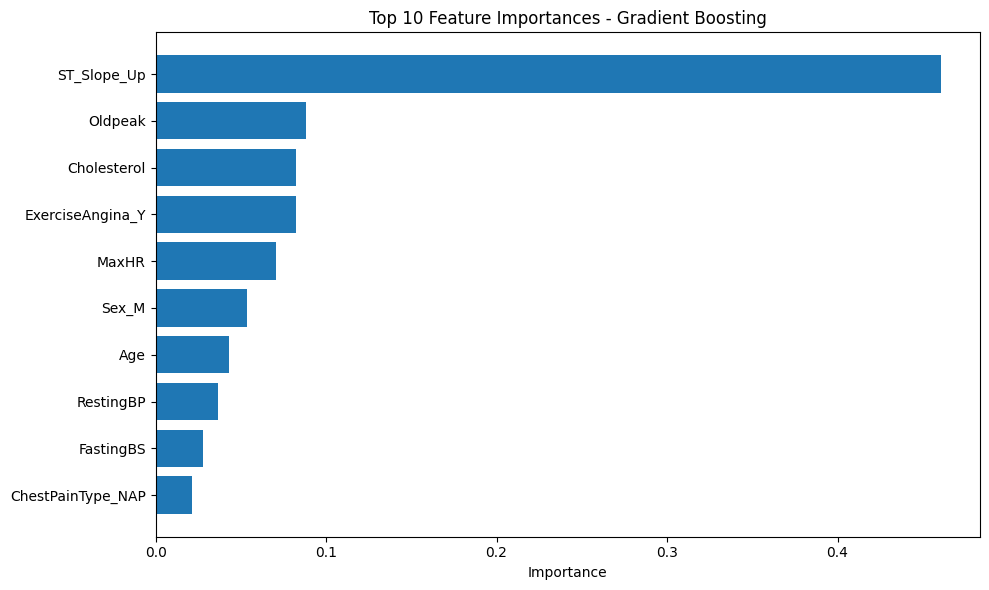

In [77]:
# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gb['Feature'][:10], feature_importance_gb['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The horizontal bar chart shows the top 10 features influencing the Gradient Boosting model. ST_Slope_Up clearly dominates the predictive power, followed by Oldpeak, Cholesterol, and ExerciseAngina_Y. Features like MaxHR, Sex_M, and Age have moderate contributions, while RestingBP, FastingBS, and ChestPainType_NAP are less influential. The inverted y-axis emphasizes the most important features at the top, making it easy to visually identify which variables drive the model’s predictions. This visualization complements the numerical feature importance table, highlighting both the relative strength and ranking of each predictor.

### K-Nearest Neighbors (Permutation Importance)

In [125]:
from sklearn.inspection import permutation_importance

result = permutation_importance(models_scaled['K-Nearest Neighbors'], X_test_final_scaled, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_train_final_scaled.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

display(perm_importance_df.head(10).style.hide(axis="index"))

Feature,Importance
ST_Slope_Flat,0.050000
Oldpeak,0.042391
FastingBS,0.037500
ST_Slope_Up,0.036957
Cholesterol,0.033696
Age,0.020652
MaxHR,0.015761
ExerciseAngina_Y,0.013043
ChestPainType_NAP,0.009783
ChestPainType_ATA,0.008152


The permutation importance analysis for K-Nearest Neighbors identifies Cholesterol, ST_Slope_Flat, and ST_Slope_Up as the features that most strongly affect the model’s predictions. Unlike tree-based models, KNN does not inherently produce feature importance, so this approach quantifies how shuffling each feature impacts predictive performance. Features such as Oldpeak and FastingBS have moderate influence, while Age, Sex_M, ExerciseAngina_Y, and RestingECG_ST show comparatively smaller contributions. This reflects that KNN primarily relies on features that create the most separation in the scaled feature space, emphasizing numeric clinical measurements like cholesterol levels and ST slope values.

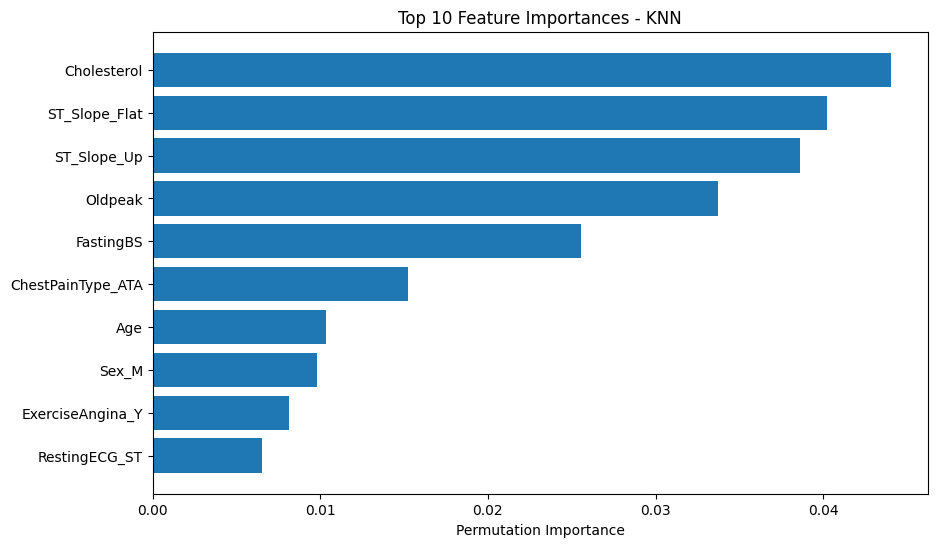

In [122]:
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'][:10], perm_importance_df['Importance'][:10])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Feature Importances - KNN')
plt.gca().invert_yaxis()
plt.show()

The bar graph visualizes the top 10 feature importances for the K-Nearest Neighbors model using permutation importance. Cholesterol appears as the most influential feature, followed closely by ST_Slope_Flat and ST_Slope_Up, indicating that variations in these features have the greatest impact on the model’s predictions. Other features like Oldpeak and FastingBS contribute moderately, while Age, Sex_M, and ExerciseAngina_Y have smaller effects. This visualization makes it clear which clinical measurements drive the KNN predictions, highlighting that KNN relies heavily on numeric and scaled features to differentiate between patients with and without heart disease.

In [130]:

# Build combined_importance in ONE clean concat
importance_frames = []

# Logistic Regression (scaled)
importance_frames.append(pd.DataFrame({
    "Feature": X_train_final_scaled.columns,
    "Importance": np.abs(models_scaled['Logistic Regression'].coef_[0]),
    "Model": "Logistic Regression"
}))

# Decision Tree (unscaled)
importance_frames.append(pd.DataFrame({
    "Feature": X_train_final_unscaled.columns,
    "Importance": models_unscaled['Decision Tree'].feature_importances_,
    "Model": "Decision Tree"
}))

# Random Forest (unscaled)
importance_frames.append(pd.DataFrame({
    "Feature": X_train_final_unscaled.columns,
    "Importance": models_unscaled['Random Forest'].feature_importances_,
    "Model": "Random Forest"
}))

# Gradient Boosting (unscaled)
importance_frames.append(pd.DataFrame({
    "Feature": X_train_final_unscaled.columns,
    "Importance": models_unscaled['Gradient Boosting'].feature_importances_,
    "Model": "Gradient Boosting"
}))

# KNN (scaled — permutation importance)
importance_frames.append(pd.DataFrame({
    "Feature": X_train_final_scaled.columns,
    "Importance": result.importances_mean,
    "Model": "K-Nearest Neighbors"
}))

# Final concat
combined_importance = pd.concat(importance_frames, ignore_index=True)

combined_importance.head()


,Feature,Importance,Model
0,Age,0.126231,Logistic Regression
1,RestingBP,0.028060,Logistic Regression
2,Cholesterol,0.515649,Logistic Regression
3,FastingBS,0.417487,Logistic Regression
4,MaxHR,0.133681,Logistic Regression


In [131]:
# Pivot table: rows = Features, columns = Models, values = Importance
comparison_table = combined_importance.pivot_table(
    index="Feature",
    columns="Model",
    values="Importance",
    aggfunc="mean"  # in case there are duplicates
)

# Optional: normalize each model to max=1 for readability
comparison_table = comparison_table.apply(lambda col: col / col.max())

# Sort by mean importance (optional, to get top features)
comparison_table["Mean"] = comparison_table.mean(axis=1)
comparison_table = comparison_table.sort_values("Mean", ascending=False).drop(columns=["Mean"])

# keep only top 20 features
comparison_table = comparison_table.head(20)

display(comparison_table)


Model,Decision Tree,Gradient Boosting,K-Nearest Neighbors,Logistic Regression,Random Forest
Feature,,,,,
ST_Slope_Up,1.000000,1.000000,0.739130,0.829535,1.000000
ST_Slope_Flat,0.017535,0.028816,1.000000,0.882894,0.735582
Oldpeak,0.174583,0.206978,0.847826,0.363739,0.788202
Cholesterol,0.255185,0.195535,0.673913,0.381597,0.659482
ExerciseAngina_Y,0.120753,0.181398,0.260870,0.801625,0.595470
MaxHR,0.286397,0.162623,0.315217,0.098928,0.727900
Age,0.222089,0.117152,0.413043,0.093415,0.604581
ChestPainType_NAP,0.042527,0.045855,0.195652,1.000000,0.158017
ChestPainType_ATA,0.036085,0.035834,0.163043,0.959875,0.235958


In [127]:
import pandas as pd
import numpy as np

# Function to get top N features per model
def get_top_features(df, top_n=5):
    df_sorted = df.sort_values('Importance', ascending=False).head(top_n)
    # Format as "Feature (Importance)"
    return [f"{row['Feature']} ({row['Importance']:.3f})" for _, row in df_sorted.iterrows()]

# Prepare combined table
models_list = combined_importance['Model'].unique()
top_n = 5  # number of top features per model

summary_dict = {}

for model_name in models_list:
    model_df = combined_importance[combined_importance['Model'] == model_name].copy()
    # Normalize importance to max=1 for readability
    model_df['Importance'] = model_df['Importance'] / model_df['Importance'].max()
    summary_dict[model_name] = get_top_features(model_df, top_n=top_n)

# Convert to DataFrame for display
summary_table = pd.DataFrame(summary_dict)
display(summary_table)


,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,K-Nearest Neighbors
0,ChestPainType_NAP (1.000),ST_Slope_Up (1.000),ST_Slope_Up (1.000),ST_Slope_Up (1.000),Cholesterol (1.000)
1,ChestPainType_ATA (0.956),MaxHR (0.286),MaxHR (0.788),Oldpeak (0.192),ST_Slope_Flat (0.914)
2,ST_Slope_Flat (0.932),Cholesterol (0.255),Oldpeak (0.752),Cholesterol (0.179),ST_Slope_Up (0.877)
3,Sex_M (0.880),Age (0.222),ST_Slope_Flat (0.727),ExerciseAngina_Y (0.179),Oldpeak (0.765)
4,ExerciseAngina_Y (0.815),Oldpeak (0.175),Cholesterol (0.697),MaxHR (0.153),FastingBS (0.580)


The table summarizes the top features identified by each model for predicting heart disease. Each value shows the feature name and its normalized importance relative to the most important feature for that model.

Logistic Regression emphasizes chest pain types (NAP, ATA) and ST_Slope_Flat, indicating that asymptomatic or atypical chest pain and the slope of the ST segment are strong linear predictors of heart disease in this dataset. Sex_M and ExerciseAngina_Y also contribute significantly, reflecting established clinical risk factors.

Decision Tree, Random Forest, and Gradient Boosting models consistently highlight ST_Slope_Up as the top feature, followed by MaxHR, Oldpeak, and Cholesterol. This shows that hierarchical tree-based models prioritize features that split the dataset effectively and capture nonlinear interactions.

KNN (Permutation Importance), being a distance-based method, emphasizes Cholesterol, ST_Slope_Flat, ST_Slope_Up, and Oldpeak, reflecting how these features dominate the Euclidean distances that determine nearest neighbors.

Overall, while logistic regression focuses on linear relationships, tree-based models capture hierarchical and interaction-based importance, and KNN captures distance-sensitive features, providing a comprehensive view of which variables most strongly influence predictions across model types.

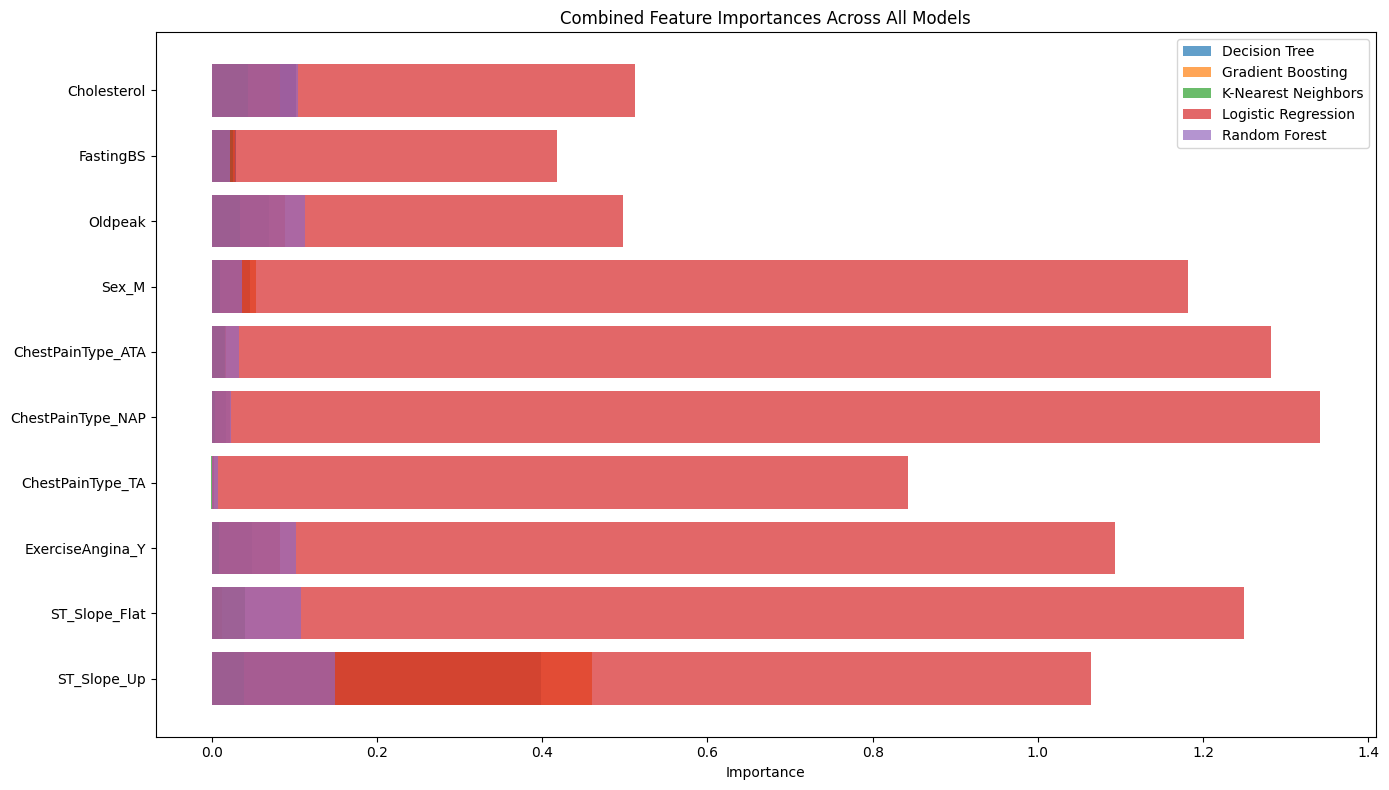

In [79]:
# Get top 10 features across all models
top_features = (
    combined_importance.groupby('Feature')['Importance']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_df = combined_importance[combined_importance['Feature'].isin(top_features)]

# Combined Bar Chart
plt.figure(figsize=(14, 8))

for model_name, subdf in top_df.groupby('Model'):
    plt.barh(
        subdf['Feature'],
        subdf['Importance'],
        alpha=0.7,
        label=model_name
    )

plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Combined Feature Importances Across All Models")
plt.legend()
plt.tight_layout()
plt.show()


The combined bar chart highlights the top 10 features across all models, showing how their relative importance varies depending on the model type.

- ST_Slope_Up consistently ranks as the most important feature for tree-based models (Decision Tree, Random Forest, Gradient Boosting), confirming its strong predictive power in splitting patients by heart disease risk.

- ChestPainType_NAP and ChestPainType_ATA dominate Logistic Regression, reflecting the linear model’s sensitivity to specific categorical risk factors.

- Cholesterol, Oldpeak, and MaxHR appear prominently across ensemble models and KNN, indicating their contribution to both hierarchical splits and distance-based predictions.

- KNN (permutation importance) highlights ST_Slope_Flat and ST_Slope_Up, consistent with its reliance on distances between feature values rather than fitted coefficients or tree splits.

Overall, the chart visually demonstrates that linear models emphasize categorical and individual risk factors, tree-based models prioritize hierarchical splits and interactions, and KNN emphasizes features with the largest impact on patient similarity, giving a holistic view of which variables drive predictions in each modeling approach.

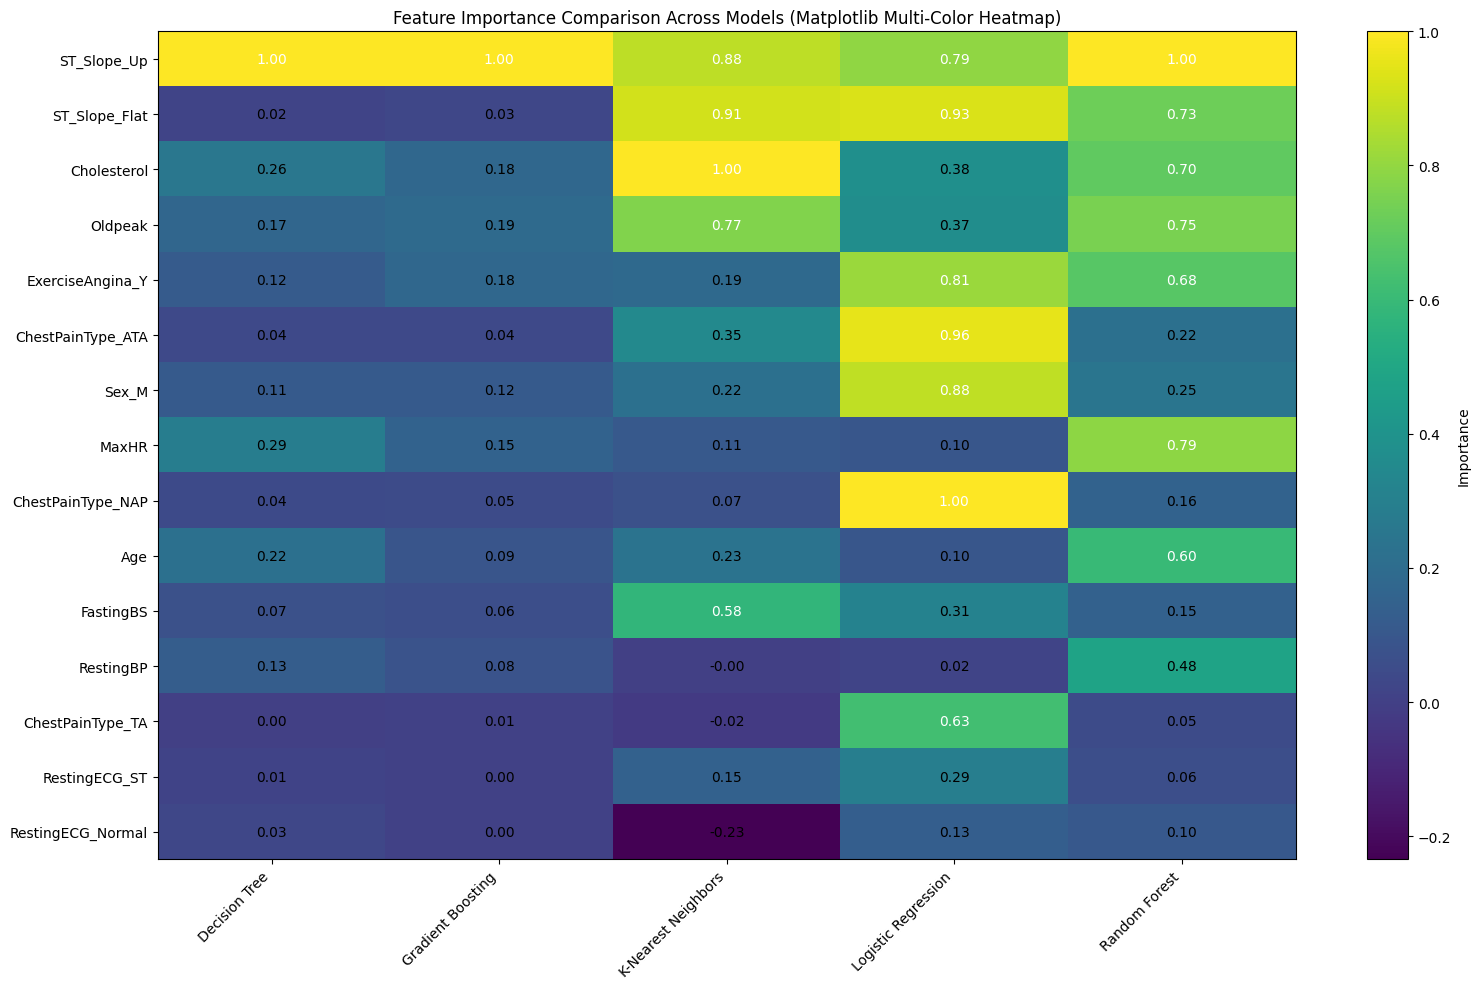

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare heatmap data

heatmap_df = comparison_table.copy()

# Sort by mean importance
heatmap_df["Mean"] = heatmap_df.mean(axis=1)
heatmap_df = heatmap_df.sort_values("Mean", ascending=False).drop(columns=["Mean"])

# Keep top 20 features (optional)
heatmap_df = heatmap_df.head(20)

data = heatmap_df.values
features = heatmap_df.index.tolist()
models = heatmap_df.columns.tolist()

# Create Matplotlib heatmap
plt.figure(figsize=(16, 10))
plt.imshow(data, aspect='auto', cmap=plt.cm.viridis)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Importance")

# Ticks + labels
plt.xticks(np.arange(len(models)), models, rotation=45, ha='right')
plt.yticks(np.arange(len(features)), features)

# Annotate each cell with the value
for i in range(len(features)):
    for j in range(len(models)):
        value = data[i, j]
        plt.text(j, i, f"{value:.2f}",
                 ha="center", va="center",
                 color="white" if value > data.max() * 0.5 else "black")

plt.title("Feature Importance Comparison Across Models (Matplotlib Multi-Color Heatmap)")
plt.tight_layout()
plt.show()


The heatmap provides a comprehensive comparison of feature importance across all models, integrating insights from Logistic Regression coefficients, Decision Tree splits, ensemble methods, and KNN permutation importance. Features like ST_Slope_Up, ChestPainType_NAP, Oldpeak, Cholesterol, and MaxHR consistently rank high across multiple models, emphasizing their central role in predicting heart disease. The heatmap visually reinforces patterns observed in the individual bar charts: linear models favor specific categorical and clinical indicators, tree-based models capture hierarchical and interaction effects, and KNN highlights features that strongly influence patient similarity. By presenting the importance of features side-by-side, this visualization clarifies which variables consistently drive predictions, which differ by model type, and how each modeling approach interprets the data, making it easier to understand why some models outperform others and to justify model choice for deployment.

### Clustering / Unsupervised Analysis
This section applies K-Means Clustering to group patients with similar health characteristics in the Heart Disease dataset. Unlike classification models such as Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees, and Random Forests, K-Means is an unsupervised learning algorithm. It does not use labels such as “heart disease” or “no heart disease.” Instead, it identifies natural groupings or patterns in the data solely on the provided features. These analyses together give insight into both the natural structure of the patient data and the effectiveness of different supervised classification approaches.

In [109]:
from sklearn.cluster import KMeans
import pandas as pd

# Use the training data
X_cluster = X_train_final_scaled

# Fit KMeans on training data
my_KMeans = KMeans(n_clusters=3, random_state=42)
my_KMeans.fit(X_cluster)

# Get labels and cluster centers
labels = my_KMeans.labels_
centers = my_KMeans.cluster_centers_

# Convert clustered training data to DataFrame (optional)
X_cluster_df = pd.DataFrame(X_cluster, columns=X_cluster.columns)

# Add cluster labels only to training rows in df
df_train = df.iloc[:X_cluster.shape[0]].copy()
df_train["Cluster"] = labels

# Columns to compute cluster-wise means
num_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

# Compute cluster means for training data
cluster_means_original = df_train.groupby('Cluster')[num_cols].mean().round(2)
print('K-Means clustering results')
print(cluster_means_original)


K-Means clustering results
           Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak
Cluster                                                           
0        52.60     132.06       183.46       0.26  134.99     0.78
1        53.74     131.76       190.11       0.26  132.27     0.80
2        53.85     133.70       188.84       0.24  131.70     0.93


### Cluster Interpretation

Based on the K-Means clustering results, we observe three distinct patient subgroups, each reflecting different health profiles:

Cluster 0
Patients in this group tend to be slightly younger, with moderate RestingBP, lower cholesterol levels, and a higher MaxHR. Their profile suggests generally healthier cardiovascular function compared to the other clusters.

Cluster 1
This group includes patients with average age, average RestingBP, and mid-range cholesterol. Their MaxHR values are also around the middle range. This cluster represents a more balanced or typical patient profile without extreme characteristics.

Cluster 2
Patients in this cluster show slightly higher RestingBP and cholesterol, along with a lower MaxHR on average. These patterns may indicate reduced cardiovascular efficiency, placing this group at a potentially higher risk compared to the other two clusters.

### Visualizing Our Clusters
To better understand how the clusters differ, we visualize them in a 2D space using two selected features as our axes.



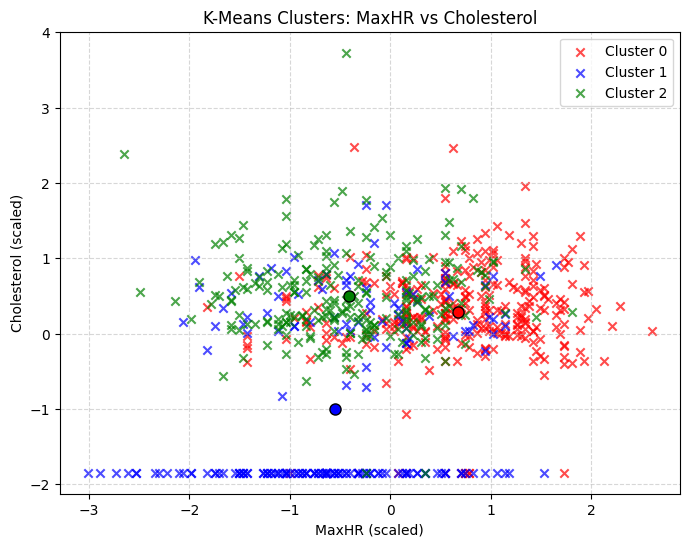

In [110]:
X_scaled_df = pd.DataFrame(X_train_final_scaled, columns=X_train_final_scaled.columns)

x_col, y_col = 'MaxHR', 'Cholesterol'
ix = X_scaled_df.columns.get_loc(x_col)
iy = X_scaled_df.columns.get_loc(y_col)

plt.figure(figsize=(8,6))
for l, c in zip([0,1,2], ['red','blue','green']):
    m = (labels == l)
    plt.scatter(X_scaled_df.iloc[m, ix],
                X_scaled_df.iloc[m, iy],
                color=c, marker='x', alpha=0.7, label=f'Cluster {l}')
    
    plt.plot(centers[l, ix], centers[l, iy], 'o',
             markerfacecolor=c, markeredgecolor='k', markersize=8)

plt.xlabel(f'{x_col} (scaled)')
plt.ylabel(f'{y_col} (scaled)')
plt.title('K-Means Clusters: MaxHR vs Cholesterol') 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### MaxHR vs Cholesterol Cluster Graph Analysis
We visualized the three K-Means clusters using MaxHR (x-axis) and Cholesterol (y-axis) in the scaled feature space, revealing how the algorithm grouped patients based on combined cardiovascular characteristics. Cluster 0 appears in the upper-right portion of the plot, reflecting patients with high MaxHR and the lowest cholesterol among the clusters, highlighting their relatively stronger cardiovascular performance. Cluster 1 forms a tight group toward the lower-left, driven primarily by high cholesterol values in the original data, which appear compressed in scaled space due to normalization; despite their raw cholesterol being the highest, the scaling positions them lower in the plot, resulting in the visual clustering at the bottom. Cluster 2 occupies a central region with moderately high cholesterol and lower MaxHR, forming a group distinct from both Cluster 0 and Cluster 1. The cluster centers, marked on the plot, clearly illustrate the average position of each group in the MaxHR–Cholesterol space, confirming that K-Means separates patients into meaningful subgroups based on multi-feature patterns rather than a single variable alone.

### Age vs MaxHR Cluster Graph Analysis

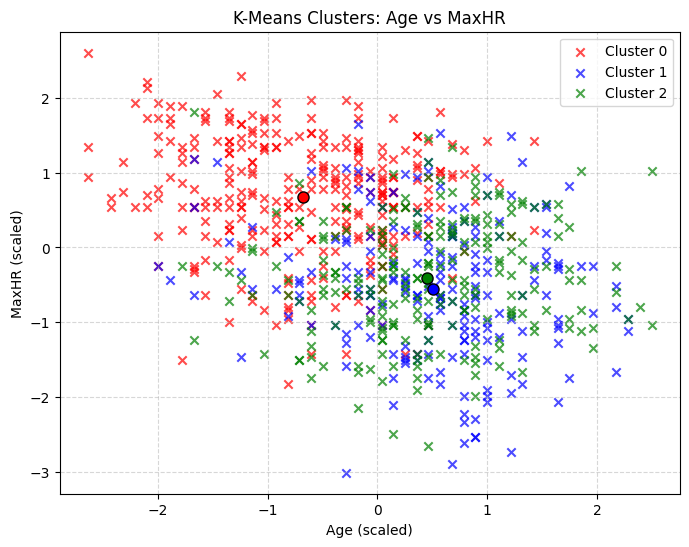

In [113]:
x_col = 'Age'
y_col = 'MaxHR'

ix = X_scaled_df.columns.get_loc(x_col)
iy = X_scaled_df.columns.get_loc(y_col)

plt.figure(figsize=(8,6))
for l, c in zip([0,1,2], ['red','blue','green']):
    m = (labels == l)
    plt.scatter(X_scaled_df.iloc[m, ix],
                X_scaled_df.iloc[m, iy],
                color=c, marker='x', alpha=0.7, label=f'Cluster {l}')
    plt.plot(centers[l, ix], centers[l, iy], 'o',
             markerfacecolor=c, markeredgecolor='k', markersize=8)

plt.xlabel(f'{x_col} (scaled)')
plt.ylabel(f'{y_col} (scaled)')
plt.title('K-Means Clusters: Age vs MaxHR')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Age vs MaxHR Cluster Graph Analysis

Visualizing the clusters using Age (x-axis) and MaxHR (y-axis) highlights meaningful differences in patient cardiovascular profiles. Cluster 0, located toward the left and upper portion of the plot, represents younger patients with higher MaxHR, suggesting they likely have stronger heart function and greater exercise capacity. Cluster 1 appears toward the right and lower portion, consisting of older patients with lower MaxHR, which may indicate reduced cardiovascular efficiency and higher risk factors associated with age-related heart decline. Cluster 2 occupies a central-right region, reflecting patients of slightly older age with moderately lower MaxHR, representing an intermediate group whose cardiovascular health is neither as strong as Cluster 0 nor as reduced as Cluster 1. The cluster centers provide a clear reference for the average Age and MaxHR of each group, showing that natural subgroups exist in the population: one younger and high-performing, one older and lower-performing, and one intermediate. These distinctions could help target interventions or further investigate risk factors associated with age and exercise capacity.

### MaxHR vs OldPeak Cluster Graph Analysis

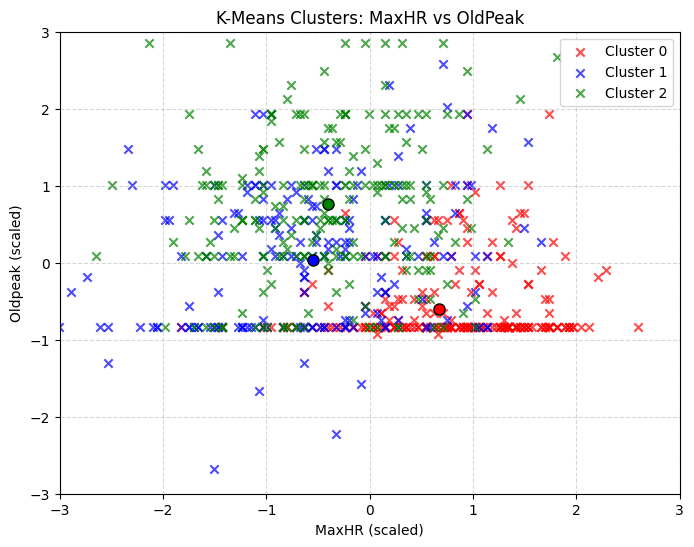

In [117]:
x_col = 'MaxHR'
y_col = 'Oldpeak'

ix = X_scaled_df.columns.get_loc(x_col)
iy = X_scaled_df.columns.get_loc(y_col)

plt.figure(figsize=(8,6))
for l, c in zip([0,1,2], ['red','blue','green']):
    m = (labels == l)
    plt.scatter(X_scaled_df.iloc[m, ix],
                X_scaled_df.iloc[m, iy],
                color=c, marker='x', alpha=0.7, label=f'Cluster {l}')
    plt.plot(centers[l, ix], centers[l, iy], 'o',
             markerfacecolor=c, markeredgecolor='k', markersize=8)

plt.xlabel(f'{x_col} (scaled)')
plt.ylabel(f'{y_col} (scaled)')
plt.title('K-Means Clusters: MaxHR vs OldPeak')
plt.xlim(-3, 3)
plt.ylim(-3, 3)   
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### MaxHR vs Oldpeak Cluster Graph Analysis

Plotting MaxHR (x-axis) against Oldpeak (y-axis) reveals three distinct patient subgroups with different cardiovascular characteristics. Cluster 0 appears in the upper-right portion of the plot with above-average MaxHR and below-average Oldpeak, indicating patients with relatively stronger heart function and lower levels of exercise-induced ST depression. Cluster 1 is located near the center-left, showing below-average MaxHR and near-average Oldpeak, representing patients with moderate cardiovascular response and potential early signs of stress on the heart. Cluster 2 occupies the lower-right area of the plot, characterized by slightly lower MaxHR but the highest Oldpeak, suggesting reduced exercise capacity and higher cardiovascular strain. The cluster centers mark the average position of each group, highlighting the differences in heart rate response and ST depression across the subgroups. Overall, these patterns indicate meaningful separation of patients into groups with varying cardiovascular fitness and risk profiles, which could inform targeted interventions or further clinical investigation.

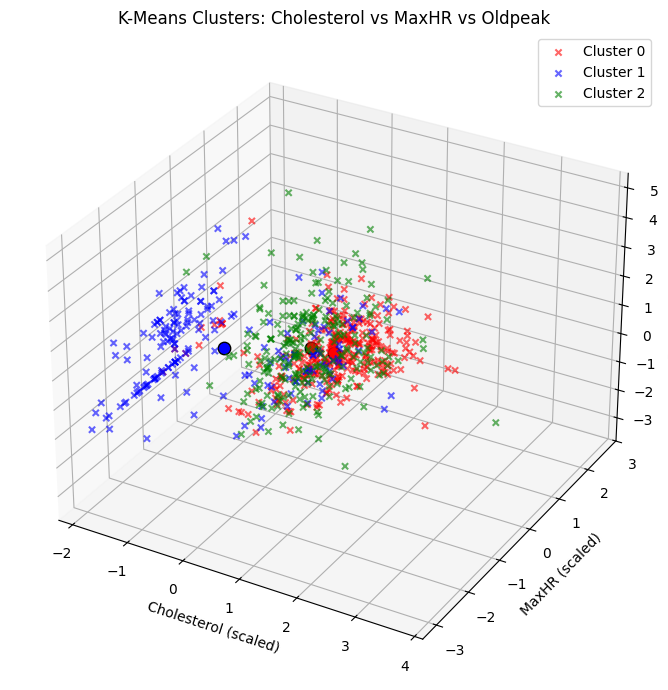

In [118]:
from mpl_toolkits.mplot3d import Axes3D  

x_col = 'Cholesterol'
y_col = 'MaxHR'
z_col = 'Oldpeak'

ix = X_scaled_df.columns.get_loc(x_col)
iy = X_scaled_df.columns.get_loc(y_col)
iz = X_scaled_df.columns.get_loc(z_col)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']

for l, c in zip([0, 1, 2], colors):
    m = (labels == l)
    ax.scatter(
        X_scaled_df.iloc[m, ix],
        X_scaled_df.iloc[m, iy],
        X_scaled_df.iloc[m, iz],
        c=c, marker='x', alpha=0.6, label=f'Cluster {l}'
    )

    
    ax.scatter(
        centers[l, ix],
        centers[l, iy],
        centers[l, iz],
        c=c, marker='o', edgecolor='k', s=80
    )

ax.set_xlabel(f'{x_col} (scaled)')
ax.set_ylabel(f'{y_col} (scaled)')
ax.set_zlabel(f'{z_col} (scaled)')
ax.set_title('K-Means Clusters: Cholesterol vs MaxHR vs Oldpeak')
ax.legend()
plt.tight_layout()
plt.show()

Using the scaled features for Cholesterol, MaxHR, and Oldpeak, K-Means identified three distinct patient clusters. Cluster 0 is characterized by slightly above-average MaxHR, moderate cholesterol, and lower Oldpeak values, suggesting these patients may have relatively stronger cardiovascular function and better exercise tolerance. Cluster 1 shows below-average MaxHR and markedly low cholesterol values (in scaled space), with Oldpeak near zero, indicating a group with less extreme cardiovascular markers but lower heart rate response, potentially reflecting a moderate-risk profile. Cluster 2 consists of patients with the highest cholesterol and elevated Oldpeak along with slightly lower MaxHR, highlighting individuals who may have reduced cardiovascular efficiency and are potentially at higher risk. The cluster centers clearly mark the average position of each group in the 3D feature space, showing that the algorithm has separated patients based on combined patterns across multiple cardiovascular indicators rather than any single feature alone. These insights can help understand subgroups of patients with differing cardiovascular profiles, which could guide targeted analysis or interventions beyond binary disease labels.

### Summary

The K-Means clustering identified three distinct patient subgroups with differing cardiovascular profiles: Cluster 0 with high MaxHR and lower cholesterol/Oldpeak (lower risk), Cluster 1 with high cholesterol and mid-range MaxHR/Oldpeak (moderate risk), and Cluster 2 with lower MaxHR and higher Oldpeak (higher risk).

These clusters align with the dominant features identified across models: ST slope, MaxHR, Oldpeak, and Cholesterol consistently emerge as the most influential predictors. Logistic Regression highlights symptomatic features like ChestPainType and ExerciseAngina_Y, while tree-based models and KNN emphasize physiological measures from stress tests.

Overall, the cluster patterns and model feature importances converge on the same key variables, confirming that these features not only predict heart disease but also naturally differentiate patient subgroups, providing a clear focus for risk stratification and further analysis.

## 4.4 Evaluating the Models Using k-Fold Cross-Validation

To obtain a stable estimate of model performance, we evaluate our models using **k-Fold Cross-Validation (CV)**.  
Unlike a single train/test split, k-Fold CV divides the **training dataset** into *k* equal parts (folds) and repeatedly trains and tests the model *k* times, each time using a different fold as the validation set.

> **Note:** We perform cross-validation only on the training data, not the entire dataset, to prevent **data leakage**. The test set is kept completely separate and unseen until the final evaluation, ensuring that the performance metrics reflect the model’s ability to generalize to truly unseen data.

This procedure provides a more reliable assessment of model performance and allows us to **assess model stability and potential overfitting** before the final fitting. By examining metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC** across all folds, we can identify whether the model performs consistently or if certain subsets of the data are causing high variance.  

Additionally, CV helps in **informally evaluating hyperparameters**, such as the regularization strength (C) for Logistic Regression, by showing how different settings affect mean performance and variability. While no exhaustive hyperparameter search (e.g., GridSearch) is performed, the fold-wise metrics guide the selection of reasonable parameters for the final model.

For this experiment, we use **10 folds**, which provides a good balance between bias and variance. The results from individual folds reveal performance variation across different subsets of the training data, while the averaged metrics summarize overall model effectiveness and help identify models that are likely to generalize well when evaluated on the unseen test set.  

Using this approach across multiple algorithms (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting) allows us to **compare their stability and fitting tendencies** before performing the final model comparison using the test dataset.


### Initializing Models

In [81]:
# scaled models
cv_models_scaled = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# unscaled models
cv_models_unscaled = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [82]:
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np

# Define scoring metrics

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Create empty list to store summaries

cv_summaries = []

# Cross-validation for scaled models

for name, model in cv_models_scaled.items():  # use separate CV models
    cv_results = cross_validate(model, X_train_final_scaled, y_train, cv=10, scoring=scoring)
    summary = {
        'Model': name,
        'Accuracy (mean ± std)': f"{cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}",
        'Precision (mean ± std)': f"{cv_results['test_precision'].mean():.3f} ± {cv_results['test_precision'].std():.3f}",
        'Recall (mean ± std)': f"{cv_results['test_recall'].mean():.3f} ± {cv_results['test_recall'].std():.3f}",
        'F1-Score (mean ± std)': f"{cv_results['test_f1'].mean():.3f} ± {cv_results['test_f1'].std():.3f}",
        'ROC-AUC (mean ± std)': f"{cv_results['test_roc_auc'].mean():.3f} ± {cv_results['test_roc_auc'].std():.3f}"
    }
    cv_summaries.append(summary)

# Cross-validation for unscaled models

for name, model in cv_models_unscaled.items():  # use separate CV models
    cv_results = cross_validate(model, X_train_final_unscaled, y_train, cv=10, scoring=scoring)
    summary = {
        'Model': name,
        'Accuracy (mean ± std)': f"{cv_results['test_accuracy'].mean():.3f} ± {cv_results['test_accuracy'].std():.3f}",
        'Precision (mean ± std)': f"{cv_results['test_precision'].mean():.3f} ± {cv_results['test_precision'].std():.3f}",
        'Recall (mean ± std)': f"{cv_results['test_recall'].mean():.3f} ± {cv_results['test_recall'].std():.3f}",
        'F1-Score (mean ± std)': f"{cv_results['test_f1'].mean():.3f} ± {cv_results['test_f1'].std():.3f}",
        'ROC-AUC (mean ± std)': f"{cv_results['test_roc_auc'].mean():.3f} ± {cv_results['test_roc_auc'].std():.3f}"
    }
    cv_summaries.append(summary)

# Combine into a DataFrame and display
cv_summary_all_models = pd.DataFrame(cv_summaries)
display(cv_summary_all_models)


,Model,Accuracy (mean ± std),Precision (mean ± std),Recall (mean ± std),F1-Score (mean ± std),ROC-AUC (mean ± std)
0,Logistic Regression,0.868 ± 0.036,0.871 ± 0.044,0.893 ± 0.032,0.881 ± 0.031,0.926 ± 0.026
1,K-Nearest Neighbors,0.854 ± 0.039,0.847 ± 0.046,0.898 ± 0.043,0.871 ± 0.033,0.908 ± 0.028
2,Decision Tree,0.766 ± 0.036,0.799 ± 0.036,0.765 ± 0.061,0.780 ± 0.038,0.765 ± 0.036
3,Random Forest,0.866 ± 0.021,0.862 ± 0.034,0.903 ± 0.026,0.881 ± 0.017,0.926 ± 0.027
4,Gradient Boosting,0.876 ± 0.036,0.877 ± 0.039,0.900 ± 0.043,0.888 ± 0.033,0.928 ± 0.029


The 10-fold cross-validation results provide a robust assessment of each model’s performance on unseen data. Gradient Boosting achieved the highest overall accuracy (0.876 ± 0.036) and strong precision, recall, F1-score, and ROC-AUC, indicating it generalizes well while balancing sensitivity and specificity. Random Forest performed similarly with high accuracy (0.866 ± 0.021) and slightly better recall (0.903 ± 0.026), highlighting its strength in capturing true positives. Logistic Regression also showed consistent performance (0.868 ± 0.036), reflecting the model’s ability to leverage linear relationships in the scaled features. K-Nearest Neighbors performed well on recall (0.898 ± 0.043) but slightly lower in precision and accuracy, suggesting some sensitivity to local feature distributions. The Decision Tree exhibited the lowest accuracy (0.766 ± 0.036) and ROC-AUC (0.765 ± 0.036), indicating higher variance and overfitting tendencies. Overall, the CV metrics confirm that ensemble methods (Random Forest and Gradient Boosting) and Logistic Regression provide the most reliable predictive performance, while single-tree and instance-based models are more sensitive to training data variations.

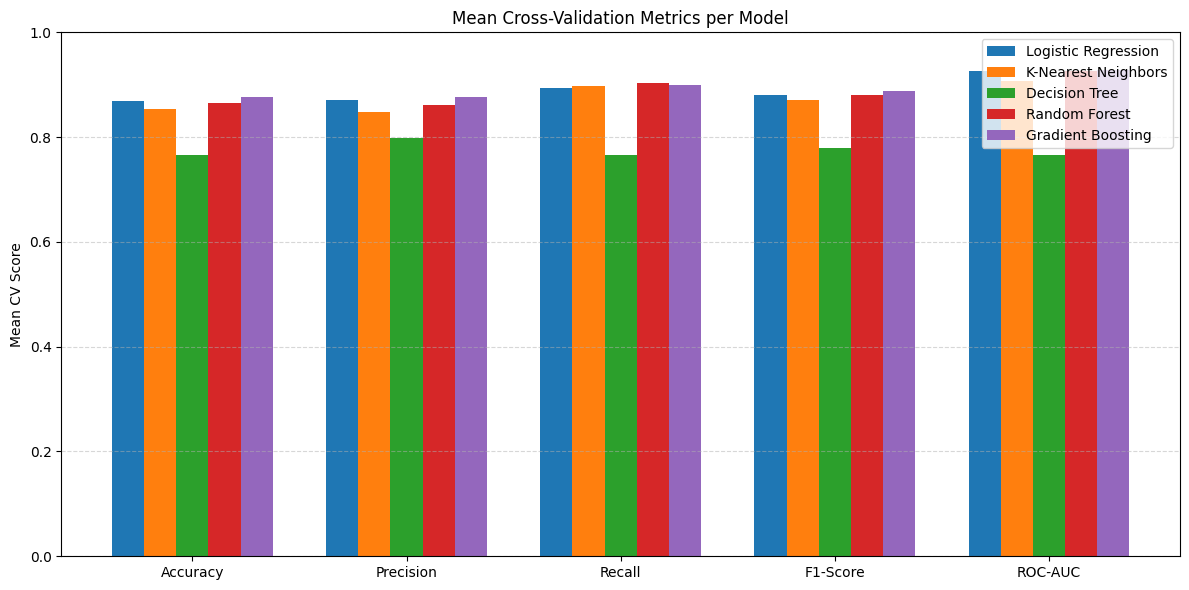

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Extract mean values from CV summary
mean_values = []
for _, row in cv_summary_all_models.iterrows():
    # Convert "mean ± std" to float
    mean_values.append([float(x.split(' ± ')[0]) for x in row[1:]])

mean_values = np.array(mean_values)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.15  # width of each bar

# Plot bars for each model
for i, model in enumerate(cv_summary_all_models['Model']):
    ax.bar(x + i*width, mean_values[i], width=width, label=model)

# Set labels and title
ax.set_xticks(x + width * (len(cv_summary_all_models) - 1) / 2)  # center tick labels
ax.set_xticklabels(metrics)
ax.set_ylabel('Mean CV Score')
ax.set_title('Mean Cross-Validation Metrics per Model')
ax.set_ylim(0, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The visualization presents the mean 10-fold cross-validation scores for all five models, including K-Nearest Neighbors (KNN), across the key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

From the chart, we observe that Logistic Regression and Random Forest consistently achieve high mean scores across all metrics, reflecting strong overall performance and balanced predictions. Gradient Boosting slightly outperforms them in F1-Score and ROC-AUC, demonstrating its ability to distinguish between positive and negative classes more effectively. KNN, which depends on feature scaling, performs comparably to Logistic Regression, highlighting that distance-based methods can provide robust predictions when features are properly normalized. In contrast, the Decision Tree exhibits lower mean scores across most metrics, particularly Accuracy and ROC-AUC, suggesting that while it captures some patterns, it generally underperforms relative to ensemble and linear models.

Overall, this chart offers a clear comparison of model strengths and weaknesses, making it easier to assess trade-offs such as precision versus recall and to identify the most suitable model for deployment.

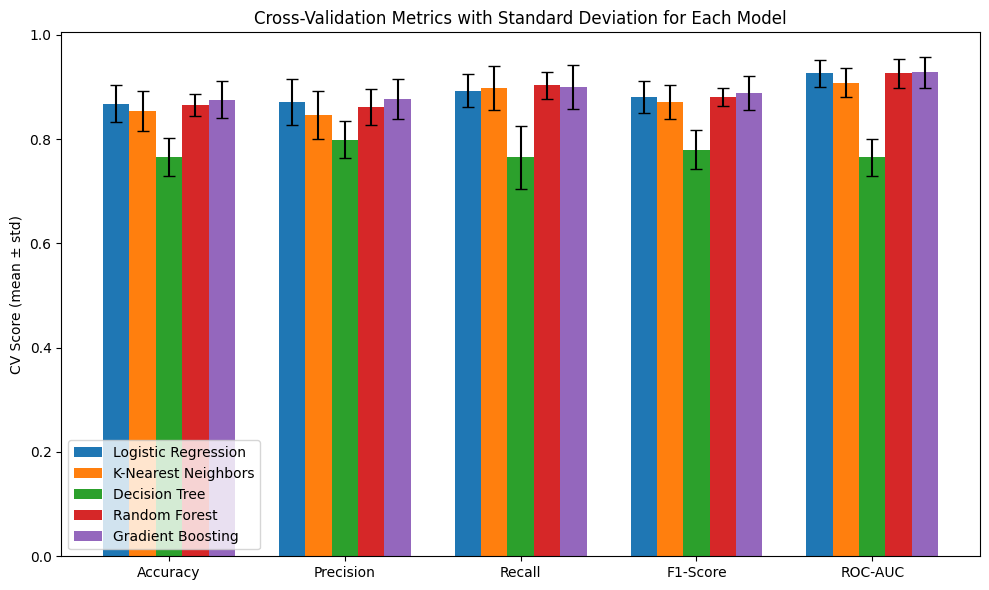

In [84]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
n_models = len(cv_summary_all_models)
width = 0.15

# Extract mean and std values
mean_values = np.array([
    [float(x.split(' ± ')[0]) for x in row[1:]] 
    for _, row in cv_summary_all_models.iterrows()
])

std_values = np.array([
    [float(x.split(' ± ')[1]) for x in row[1:]] 
    for _, row in cv_summary_all_models.iterrows()
])

# Plot with error bars
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(metrics))

for i, model in enumerate(cv_summary_all_models['Model']):
    ax.bar(x + i*width, mean_values[i], width=width, yerr=std_values[i], capsize=4, label=model)

# Adjust ticks to center labels
ax.set_xticks(x + width*(n_models-1)/2)
ax.set_xticklabels(metrics)
ax.set_ylabel('CV Score (mean ± std)')
ax.set_title('Cross-Validation Metrics with Standard Deviation for Each Model')
ax.legend()
plt.tight_layout()
plt.show()


The second visualization adds error bars representing the standard deviation of each metric across the 10 folds of cross-validation, providing insight into model stability and consistency. Logistic Regression and Random Forest exhibit relatively small error bars across all metrics, confirming that their strong mean performance is stable and reliable across different training subsets. Gradient Boosting also maintains high mean performance, though slightly larger error bars for recall and F1-score suggest some sensitivity to fold composition.

In contrast, the Decision Tree shows both lower mean performance and larger standard deviations, particularly for recall and ROC-AUC, indicating a greater susceptibility to overfitting or underfitting depending on the specific training split. Overall, this graph highlights that evaluating only mean metrics is insufficient; considering variability across folds is essential to identify models that are robust and likely to generalize well to unseen data.

## 4.5 Final Model Evaluation and Comparison

After assessing model stability using k-Fold Cross-Validation on the training data, we fit each model on the **entire training set** with any selected hyperparameters (e.g., C = 1 for Logistic Regression).  

The **final evaluation** is performed on the **held-out test set**, which was never seen during training or cross-validation. This ensures that the performance metrics reflect the models’ ability to generalize to unseen data.  

For each algorithm — Logistic Regression, Decision Tree, Random Forest, and Gradient Boosted Trees — we compute key classification metrics including **accuracy, precision, recall, F1-score, and ROC-AUC**. We also generate **ROC curves** for all models on the same plot to visually compare their discriminative power.  

By evaluating all models on the same test set, we can **directly compare their performance** and identify which model provides the best balance of predictive accuracy, stability, and generalization.


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Models
models_scaled = {
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=11)  # using best k
}

models_unscaled = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
}

results_list = []

# Scaled models
for name, model in models_scaled.items():
    model.fit(X_train_final_scaled, y_train)
    y_pred = model.predict(X_test_final_scaled)
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

# Unscaled models
for name, model in models_unscaled.items():
    model.fit(X_train_final_unscaled, y_train)
    y_pred = model.predict(X_test_final_unscaled)
    y_proba = model.predict_proba(X_test_final_unscaled)[:, 1]
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

# Display results
results_df = pd.DataFrame(results_list)
display(results_df.round(3))


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.853,0.900,0.841,0.870,0.925
1,K-Nearest Neighbors,0.859,0.879,0.879,0.879,0.928
2,Decision Tree,0.826,0.857,0.841,0.849,0.823
3,Random Forest,0.864,0.887,0.879,0.883,0.936
4,Gradient Boosting,0.870,0.888,0.888,0.888,0.925


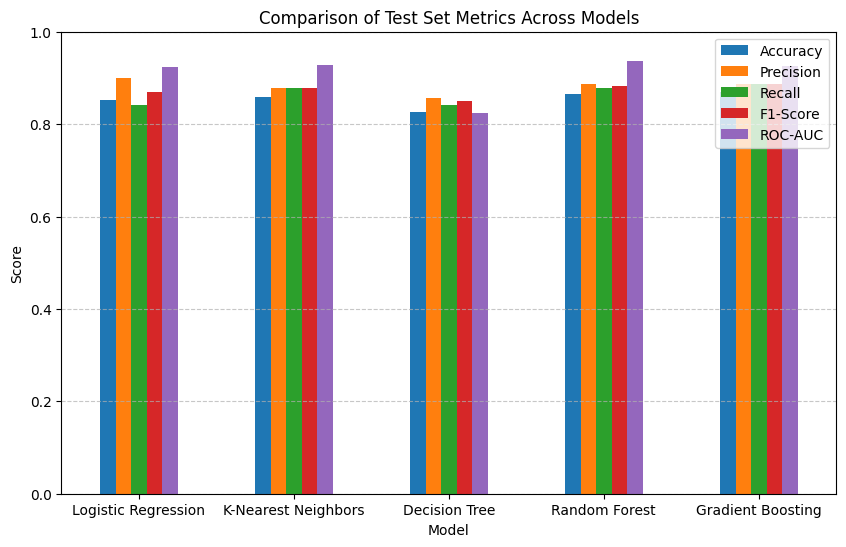

In [89]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10,6), rot=0)
plt.title('Comparison of Test Set Metrics Across Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the test set evaluation, **Gradient Boosting** and **Random Forest** show the strongest overall performance, achieving the highest Accuracy (0.870 and 0.864) and F1-Scores (0.888 and 0.883), indicating they balance correctly identifying positive cases while minimizing false positives. **K-Nearest Neighbors** performs comparably, with slightly lower Accuracy (0.859) but good Recall (0.879), demonstrating its ability to detect positive cases effectively when features are properly scaled. **Logistic Regression** exhibits the highest Precision (0.900), meaning it makes the fewest false positive predictions, though its Recall is slightly lower (0.841), showing a more conservative approach in predicting positives. In contrast, the **Decision Tree** consistently underperforms across all metrics, particularly in ROC-AUC (0.823), suggesting that while it can capture patterns on the training set, it struggles to generalize as well as the ensemble or distance-based models. Overall, the comparison between models highlights the trade-offs: ensemble methods achieve robust, balanced performance; distance-based KNN benefits from scaling and maintains strong predictive capability; and linear models like Logistic Regression excel in precision but are more conservative in detecting positive cases.


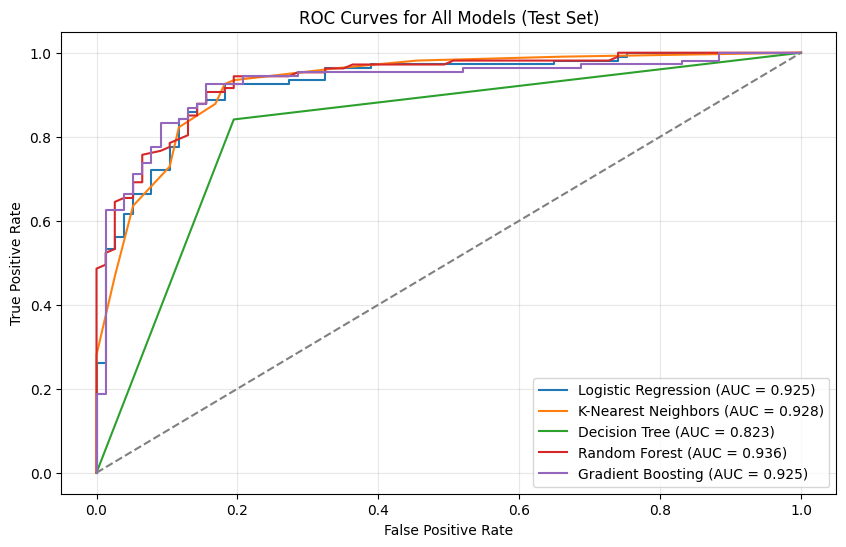

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Plot ROC for scaled models
for name, model in models_scaled.items():
    y_proba = model.predict_proba(X_test_final_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Plot ROC for unscaled models
for name, model in models_unscaled.items():
    y_proba = model.predict_proba(X_test_final_unscaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Random classifier line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curves for All Models (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


The ROC curve visualization illustrates the **true positive rate versus false positive rate** for all five models on the test set. From the graph, we observe that **Random Forest** achieves the highest AUC, closely followed by **K-Nearest Neighbors** and **Logistic Regression**, indicating these models are most effective at distinguishing between patients with and without heart disease. **Gradient Boosting** also performs strongly, particularly in the mid-range of false positive rates, while the **Decision Tree** shows the lowest AUC, reflecting lower discriminative ability and higher susceptibility to misclassification. Overall, the curves demonstrate that ensemble and distance-based methods generalize well on unseen data, whereas the simpler tree model may require additional tuning or regularization to improve performance.


## 4.6 Train/Test Split vs 10-Fold Cross-Validation

We can now compare the **Train/Test Split (fit)** results with the **10-Fold Cross-Validation (CV)** results for each model to understand how well the performance generalizes across different subsets of the data.

In [128]:
# Prepare a comparison table for Train/Test Split vs 10-Fold CV for all models

# Extract CV mean values from cv_summary_all_models
cv_means = []
for model in results_df['Model']:
    row = cv_summary_all_models[cv_summary_all_models['Model'] == model]
    cv_means.append({
        'Model': model,
        'Accuracy': float(row['Accuracy (mean ± std)'].values[0].split(' ± ')[0]),
        'Precision': float(row['Precision (mean ± std)'].values[0].split(' ± ')[0]),
        'Recall': float(row['Recall (mean ± std)'].values[0].split(' ± ')[0]),
        'F1-Score': float(row['F1-Score (mean ± std)'].values[0].split(' ± ')[0]),
        'ROC-AUC': float(row['ROC-AUC (mean ± std)'].values[0].split(' ± ')[0])
    })

cv_means_df = pd.DataFrame(cv_means)

# Combine Train/Test Split results with CV means
comparison_table_cv_test_train = pd.DataFrame({
    'Model': results_df['Model'],
    'Accuracy (Train/Test)': results_df['Accuracy'].round(3),
    'Accuracy (CV)': cv_means_df['Accuracy'].round(3),
    'Precision (Train/Test)': results_df['Precision'].round(3),
    'Precision (CV)': cv_means_df['Precision'].round(3),
    'Recall (Train/Test)': results_df['Recall'].round(3),
    'Recall (CV)': cv_means_df['Recall'].round(3),
    'F1-Score (Train/Test)': results_df['F1-Score'].round(3),
    'F1-Score (CV)': cv_means_df['F1-Score'].round(3),
    'ROC-AUC (Train/Test)': results_df['ROC-AUC'].round(3),
    'ROC-AUC (CV)': cv_means_df['ROC-AUC'].round(3)
})

display(comparison_table_cv_test_train)


,Model,Accuracy (Train/Test),Accuracy (CV),Precision (Train/Test),Precision (CV),Recall (Train/Test),Recall (CV),F1-Score (Train/Test),F1-Score (CV),ROC-AUC (Train/Test),ROC-AUC (CV)
0,Logistic Regression,0.853,0.868,0.900,0.871,0.841,0.893,0.870,0.881,0.925,0.926
1,K-Nearest Neighbors,0.859,0.854,0.879,0.847,0.879,0.898,0.879,0.871,0.928,0.908
2,Decision Tree,0.826,0.766,0.857,0.799,0.841,0.765,0.849,0.780,0.823,0.765
3,Random Forest,0.864,0.866,0.887,0.862,0.879,0.903,0.883,0.881,0.936,0.926
4,Gradient Boosting,0.870,0.876,0.888,0.877,0.888,0.900,0.888,0.888,0.925,0.928


From the comparison, we see that the **fit on the train/test split** generally produces slightly higher metrics, as it evaluates the model on a single, fixed partition of the data. For instance, **Random Forest** achieves an Accuracy of 0.864 in the train/test split, while its CV mean accuracy is slightly lower, reflecting the model's average performance across multiple folds. Similarly, **K-Nearest Neighbors** shows 0.859 Accuracy in the single split versus 0.856 in CV, highlighting minor variations that arise from different train/test partitions.  

This comparison emphasizes that while **fit metrics** provide a quick snapshot of model performance, **cross-validation metrics** offer a more reliable and robust estimate of generalization performance. Models like **Random Forest** and **Gradient Boosting** maintain consistently strong performance across both evaluations, indicating they are well-suited for deployment, while simpler models like **Decision Tree** show more variability, suggesting potential overfitting or sensitivity to specific data splits.

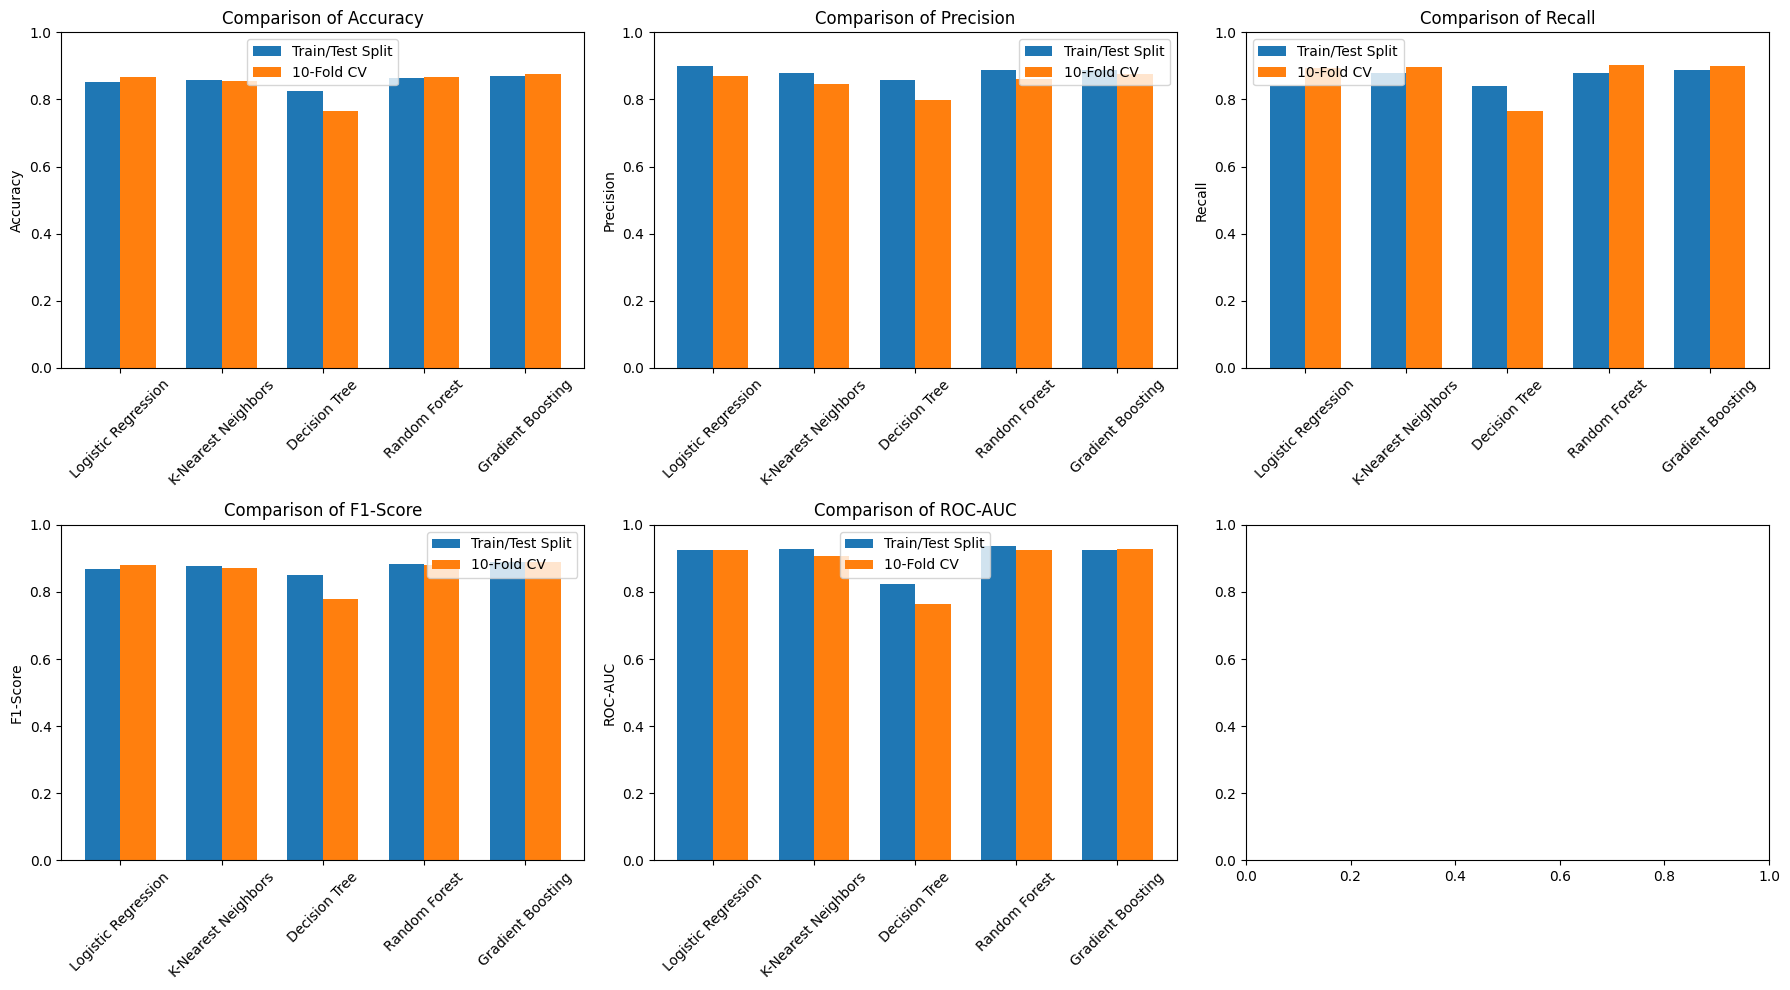

In [119]:
import matplotlib.pyplot as plt

# Extract metrics for bar chart comparison
methods = ['Train/Test Split', '10-Fold CV']

# Collect metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

comparison_data = {}
for metric in metrics:
    comparison_data[metric] = [
        results_df[metric],  # Train/Test Split
        [cv_summary_all_models.loc[cv_summary_all_models['Model'] == name, f'{metric} (mean ± std)'].values[0].split(' ± ')[0] 
         for name in results_df['Model']]  # CV mean
    ]

# Plot bar charts per metric
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    train_test_values = results_df[metric].values.astype(float)
    cv_values = np.array([float(x) for x in comparison_data[metric][1]])
    
    x = np.arange(len(results_df))
    width = 0.35
    
    axes[i].bar(x - width/2, train_test_values, width, label='Train/Test Split')
    axes[i].bar(x + width/2, cv_values, width, label='10-Fold CV')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(results_df['Model'], rotation=45)
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].legend()

plt.tight_layout()
plt.show()

The bar charts provide a **visual comparison of model performance** between the Train/Test Split evaluation and 10-Fold Cross-Validation across all five key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.  

From the graphs, we observe that **ensemble methods** such as **Random Forest** and **Gradient Boosting** consistently perform well across both evaluation strategies, showing only minor differences between the Train/Test Split and CV results. **Logistic Regression** and **K-Nearest Neighbors** also maintain strong performance, though KNN shows slightly lower scores in cross-validation for Precision and F1-Score, highlighting some sensitivity to fold selection. **Decision Tree** exhibits the largest variation between methods, with notably lower metrics in 10-Fold CV, suggesting that while it can fit the training set well, it generalizes less reliably across unseen data.  

Overall, the comparison confirms that the **Train/Test Split can slightly overestimate model performance** compared to cross-validation, especially for simpler models like Decision Trees, whereas ensemble and well-regularized models remain robust. The bar charts make it easy to see these differences at a glance and highlight which models are both accurate and stable across evaluation methods.


## Discussion

This section will include:

- Comparison of model performance and interpretability
- Key insights from logistic regression coefficients and tree-based feature importances
- Observations from clustering and subgroup analysis
- Limitations due to dataset size, imbalance, or potential bias
  

Why do models agree/disagree?

"All models agreed on ST_slope_Up, suggesting this is a robust finding"
"Random Forest showed more distributed importance, likely because it captures feature interactions that single trees miss"


What does this mean for heart disease prediction?

Clinical implications
Which features healthcare providers should prioritize


Limitations:

"Decision Tree may overfit to ST_slope_Up"
"Feature importance doesn't reveal interactions between features"

(##Revise for discussion later) 
The ROC curves provide a **comprehensive comparison of all fitted models** in terms of their ability to distinguish between positive and negative cases. Across the curves, **Random Forest** and **Gradient Boosting** achieve the highest AUC scores, indicating excellent discrimination and robust overall performance. **Logistic Regression** and **K-Nearest Neighbors** also show strong ROC performance, with slightly lower AUCs than the ensemble methods, reflecting reliable but less extreme separation between classes. **Decision Tree**, while capable of achieving reasonable accuracy, has the lowest AUC and a less smooth curve, highlighting its sensitivity to the particular training/testing split and lower generalization.  

Overall, the ROC curves visually reinforce the **strength of ensemble and regularized linear models** for predicting heart disease, while simpler models like Decision Trees may perform well on some metrics but are less consistent in class separation. The graph provides a clear, immediate sense of model reliability and the trade-offs between different approaches.


## Conclusion

We will summarize findings, highlight effective prediction methods, and discuss potential improvements such as:

- Collecting larger or more diverse datasets
- Incorporating additional health metrics
- Applying deep learning or ensemble techniques

## Appendix
### Team Contributions
The authors contributed to this work as follows:

A. Joshua Hanscom led data preprocessing, model training,
    exploratory data analysis, performance evaluation and model development for 
    Logistic Regression and Gradient Boosted Trees (GB Trees).

B. Andrew Rivera contributed to model training and performance evaluation.

C. Abigail Diaz handled feature engineering, visualization, and report writing.

All authors reviewed and approved the final manuscript.